<a href="https://colab.research.google.com/github/KristofferTolboll2/Artificial-Intelligence/blob/master/facial_beauty_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam Assignment: Beauty Facial Prediction
In this assignment i will be using the SCUT-FBP5500 dataset to create a Neural Network to predict beauty score from people's facial features. To achieve this purpose i will use a pretrained keras model `ResNet50`, along with a dropout layer to increase performance. 

Please refer to the link to the google colab for having the complete project enviroment setup and to see the cell outputs. I have submitted this file as an `.ipynb` below is links for my github repo (with outputs) and my besttrained model:

[Link to github repo](https://github.com/KristofferTolboll2/Artificial-Intelligence)

[Link to best model](https://www.dropbox.com/s/d5o206odgzvb7yn/mse-13-0.0591.h5?dl=0)
<i>You can download the best trained model for optimal results</i>

#Introduction
Below i have addressed some possible issues, that can occur during the the development process of a Deep Neural Network. I have assesed two different problems, one that occured during the development process, and one the was invented. <br />
Afterwards i will describe some intuition about the dataset, and some of the solutions i applied to solve this project. I have created two google slides presentation [model performance](https://docs.google.com/presentation/d/18BcievZBg7wX7nUplPX4-D5Y43wEMxLujoLfR6G2-gE/edit#slide=id.p) [paper and intuition](https://docs.google.com/presentation/d/1Ili8Z04nu4uaanzM8mc4YpHQSz8NwhFvIB7-bxC8t1s/edit#slide=id.p) to visualize some of the concepts i will be discussing in this notebook. They will also be refrences throughout the notebook.

##Vanishing gradient problem
A general problem, that occurs when training deep Neural Networks, is the vanishing gradient problem. The problem arrizes, when we initialize the weights of a neural network. This it also the intuition behind the use of the  <b>ReLU</b> activation function in our hidden layers as opose to the <b>Sigmoid Function</b>. 

We know, that when we are using an optimizer like <b>Gradient Descent </b> we are trying to find the <b>Global minima</b> [<i>refrence</i>](https://docs.google.com/presentation/d/1Ili8Z04nu4uaanzM8mc4YpHQSz8NwhFvIB7-bxC8t1s/edit#slide=id.g871247f80c_0_9)

The reson why we prefer to use <b>ReLU </b> in our hidden layers, is clear when we look at the derivative of the sigmoid function. 

![sigmoid derivative](https://i.stack.imgur.com/inMoa.png)
 
 If we examine the graph above, we can see, that the derivative of the <b>Sigmoid function </b> is always between <b>0 - 0.25</b>

If we remeber the <b>Gradient Descent </b> Formula from before, we know, that we have to insert in the old weight minus the learning right times the derivative of loss divided by the derivative of the weight. 

Because we have many layers in a neural network. We will use a mathematical concept called  <b>The Chain Rule </b>, which is one of the most fundamental concepts backpropagation when handling multi-layered neural networks.
Since our network will have a lot of derivatives to calculate, <b>The Chain Rule </b> allows us to take the derivative of the seperate functions and <b>"chain"</b> them together. Below i have provided a very simple example of this.

 ![Chain Rule](https://miro.medium.com/max/1092/1*e6Epzbmngh2a50WUrKleUA.png)


 The problem occurs, when we use the <b>Sigmoid Function </b> in this context, since we know, that the derivative of a sigmoid function is always ranging between <b>0-0.25</b> the end result, can end up being a very small number, which means, that the activations and the weights of the initial layers, will only be updated very minimally in larger networks. 
Since these initial layers are often crucial to recognizing the core elements of the input data, it can lead to overall inaccuracy of the whole network.


##Exploding gradient problem
Another problem, that can cause our neural network to decrease in performance is, what is known as the <b>Exploding Gradient Problem </b> this also occurs during the <b>backpropagation phase </b>. </br>
Unlike the <b>Vanishing Gradient Problem </b> where the gradient <i>"vanishes"</i> and the acivations and weights are interchangeable for each <b>Epoch </b>, the Exploding Gradient problem describe the process, that occurs, when it is not possible to reach the global minima point, during the gradient descent process. This can result in a very unstable network, where the gradient will in term <b>"bounce" or explode </b>. 
Signs that an exploding gradient problem could be occuring could be:
<li>The model is unable to get traction on your training data (e.g. poor loss).
<li>The model is unstable, resulting in large changes in loss from update to 
update.
<li>The model weights quickly become very large during training.

To prevent the Exploding Gradient problem from occuring we can use several different techniques. Durint the development process of this project, we did not experience the <b>Exploding Gradient Problem </b>. One of the main reasons, why this did not occur, might be due to the fact, that we used fairly small batch size was for this model. This was both done by specifying the batch size, when defining our constants, and using the <b>Adam optimizer </b> which derives from the stochastic gradient descent algorithm. 
<br/>
<br />
This ensures, that we only have random samples in our batch-size, which will result, in the weights not being adjusted to quickly, and leaving the model unstable. 

#Convelutional neural networks 

Convelutional neural networks are a type of Neural Networks, that is typically used for image -and video analysis. The reason, why this type of network is used, is because of it's ability to detect patterns. The major difference between a regular multilayered neural network and a CNN, is it's use of <b>Convelutional layers </b>. <br />
<br />
Where as a regular ANN would typically have some specefic input features for a dataset each represented as a neuron in the input layer. When using a CNN we interept the pixels of an image as inputs. To each of these inputs we apply a filter, that can detect patterns in the image. The filter is mapped over each pixel. This process is called the <b>Convelution</b>. The specific values, that are mapped on to the image pixels, are the <b>weights </b>, where typically we will add a bias value aswell (<b>not displayed on image</b>), which will hope us scale our values, to suit our dataset. <br />
![conv](https://static.packt-cdn.com/products/9781789138139/graphics/57b07b69-9550-4cda-a798-0578c8e30c74.png)

Well maintaining the same terms, as a regular neural network, it is simple, the way of the operations, and the input data, that is different. <br />
similarly, we will also apply an activation function, to the sum of weights, acivation values and bias. 

## Max pooling

For this project, i wanted to experiment with using the maxpooling technique in for Convelutional Neural Networks. I never implemented it in my final model, because it never improved the performance. The concept behind maxpooling, is, that you select the most powerful neurons, for each of the space, that the feature map covers. This wasy only the most dominant features will be selecte onto the next convolution. Using the keras package <br/>
`model = Sequential([MaxPooling2D(pool_size = 2, strides = 2)]))`
We could define a Sequantial model, with just a single average pooling layer. 

![Max pooling](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)

<br />

There might be several reasons why this technique may not have been the right choice for this project. Below i have specified a couple of plausible causes.
I believe the fact, that it not increased in performance might be due to  the fact, that there are many facial features, that can have an impact on our neural network, it may actually decrease acuraccy to use a technique like max pooling. Because it reduces the amount of parameters, that are passed it can rapidly rudece computational complexity, meaning, that the training process will go much faster.. But at the same time, it can also reduce some of the more meaningfull features. In our case, where we are training to analyze facial beauty, there is no real standard on how to do this, and therefore, i could be the reason, that it did not improve the accuracy of the model, because it was forced to leave out some of the more important features. 


## ResNet50 and Residual netural networks<
ResNet50 is a popular neural network, that is typically used for <b>Image classification</b> inside neural networks.
<br />
The ResNet50 is made to solve a recurring problem, when creating <b>CNN's</b>, the fact, that deeper neural networks accuracy easily gets saturated, meaning they can easily get overfitted. 
<b><i>Residual neural networks </i></b>work by skipping some of the layers during training and testing. This helps prevent the [<i>Vanishing gradient problem </i> ](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)
, by reusing the activation values until the adjacent layer learns its correct weights. 

Another cause might be the <b>degradation problem </b>

<br />
The practical reason, that <b> Residual Networks </b>are supirior in some cases are due to the facts, that they implement a tactic called a <b>Residual Block </b>, what this does in term, is to skip some of the Fully Connected Layers, and just put the output on to the next layer <i>(demontrated below)</i>.


![alt text](https://miro.medium.com/max/868/0*sGlmENAXIZhSqyFZ)

<i>As the figure above describe we have two connected weighted layers in our neural network, they each have the <b>ReLU </b> activation function, which is applied as F(X).</i>

The intuition behind this technique comes from the fact, that it gets increasingly hard training neural networks with more layers <i>(deeper NN)</i> .The more layers, that are present, the more advanced and precise we can get, but only to a certain degree. As mentioned above, very deep neural networks have two high coherence to have the performance improved. 

When we skip over layers, we look at the activation from the previous layer, and let that derterminte the activation of the current layer. <b>This ensures, that we can add more layers, without decreasing performance</b>. This also ensures, that layers, that are not improving our performance are skipped, and will not have a negative impact on our Neural Networks performance. 

In term <b>Regularization</b> is something, that we add to our <b>loss function </b> to controll for large weights <i>(see more on the use of dropout layers below)</i> <br />
In this context we can regulate for the large weights, by skipping over the neurons. 


<i>A good analogy about this concept is this:</i> <br />
Imagine you play a game with multi players in the same team, the game is about transfer a message from first player though other players, for example player A talks to player B, layer B talks to player C and so all, the last player can be repeat the same message as original message from A. But information can be lost between players because noise, quality of player sound, quality of hearing of receiver,...So if some how player A talk directily to layer C or D also, and it cause less information lost. That is the reason Resedual are used in RestNet architecture


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Download Dataset

In [13]:
import os 
!ls

gdrive	mmod_human_face_detector.dat  sample_data


In [9]:
!ls 

mmod_human_face_detector.dat  sample_data


In [10]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [11]:
!ls 

gdrive	mmod_human_face_detector.dat  sample_data


In [0]:
os.chdir('gdrive/My Drive/beauty_data')

Clone the git repo


In [0]:
!git clone https://github.com/HCIILAB/SCUT-FBP5500-Database-Release

Cloning into 'SCUT-FBP5500-Database-Release'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 226 (delta 8), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (226/226), 1.57 MiB | 11.71 MiB/s, done.
Resolving deltas: 100% (107/107), done.


Download the zip file, with google colabs <b>gdown </b>

In [0]:
!gdown --id 1w0TorBfTIqbquQVd6k3h_77ypnrvfGwf

Downloading...
From: https://drive.google.com/uc?id=1w0TorBfTIqbquQVd6k3h_77ypnrvfGwf
To: /content/SCUT-FBP5500_v2.1.zip
180MB [00:03, 51.0MB/s]


Unzip the zip folder

In [0]:
!unzip SCUT-FBP5500_v2.1.zip

Streaming output truncated to the last 5000 lines.
  inflating: SCUT-FBP5500_v2/Images/AF401.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF503.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF515.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF529.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF55.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF620.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF633.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF635.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF64.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF67.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF699.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF746.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF747.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF764.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF768.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF781.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF796.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF81.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF148.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF148

Check out the images

In [0]:
!ls SCUT-FBP5500_v2/Images

AF1000.jpg  AF1709.jpg	AF615.jpg   AM1323.jpg	AM22.jpg   AM938.jpg  CF746.jpg
AF1001.jpg  AF170.jpg	AF616.jpg   AM1324.jpg	AM230.jpg  AM939.jpg  CF747.jpg
AF1002.jpg  AF1710.jpg	AF617.jpg   AM1325.jpg	AM231.jpg  AM93.jpg   CF748.jpg
AF1003.jpg  AF1711.jpg	AF618.jpg   AM1326.jpg	AM232.jpg  AM940.jpg  CF749.jpg
AF1004.jpg  AF1712.jpg	AF619.jpg   AM1327.jpg	AM233.jpg  AM941.jpg  CF74.jpg
AF1005.jpg  AF1713.jpg	AF61.jpg    AM1328.jpg	AM234.jpg  AM942.jpg  CF750.jpg
AF1006.jpg  AF1714.jpg	AF620.jpg   AM1329.jpg	AM235.jpg  AM943.jpg  CF75.jpg
AF1007.jpg  AF1715.jpg	AF621.jpg   AM132.jpg	AM236.jpg  AM944.jpg  CF76.jpg
AF1008.jpg  AF1716.jpg	AF622.jpg   AM1330.jpg	AM237.jpg  AM945.jpg  CF77.jpg
AF1009.jpg  AF1717.jpg	AF623.jpg   AM1331.jpg	AM238.jpg  AM946.jpg  CF78.jpg
AF100.jpg   AF1718.jpg	AF624.jpg   AM1332.jpg	AM239.jpg  AM947.jpg  CF79.jpg
AF1010.jpg  AF1719.jpg	AF625.jpg   AM1333.jpg	AM23.jpg   AM948.jpg  CF7.jpg
AF1011.jpg  AF171.jpg	AF626.jpg   AM1334.jpg	AM240.jpg  AM949.jpg  CF80.jp

# Facial beauty prediction

Making our imports... We will address each of the imports in their respective cells. 

In [15]:
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
import numpy as np
from keras.layers import Dropout
import keras.backend as K
import matplotlib.pyplot as plt
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import adam
import keras
import cv2
import sys
import dlib
import os.path
from keras.optimizers import Adam
import numpy as np
import os
import pandas as pd
from collections import Counter
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from skimage.io import imread




Using TensorFlow backend.


Define CONSTS <br />
https://docs.google.com/presentation/d/18BcievZBg7wX7nUplPX4-D5Y43wEMxLujoLfR6G2-gE/edit#slide=id.g86ff0b06fe_0_48
<br />
<br />
<b>NUM_CLASSES</b> Currently the output layer comes from a single `Dense()` keras layer, which means that the out is a simple linear regression, without an activation funtion `y = wl *xl` (total weights multiplied total inputs). <br />An alternative apporach to this, would be to use classification. In this case, we would have <b> 5 different classes</b> Which would each be represented by an output neuron. To each of these neurons we could apply an activation function like <i>Softmax </i> To derterminte the score. This value is not yet implemented.
<br />
<br />
<b>DROPOUT </b> A dropout layer is, is a technique used in deep learning, which "ignores" certain neurons, which are randomly selected. Ignored meaning, that they are not included in the <b>forward -or backward propagation </b>.
The reason we use dropout rates is to prevent <b>overfitting </b> as demonstrated in the [<i>google slide </i> ](https://docs.google.com/presentation/d/18BcievZBg7wX7nUplPX4-D5Y43wEMxLujoLfR6G2-gE/edit#slide=id.g86ff0b06fe_0_48)during the initial training phase, the model was very overfit.   
This is due to the fact, that in a fully connected layer, all the neurons are very co-dependent of each other <i>(especially in a deep NN with many neurons like Resnet-50)</i>.
<br />
[<i>Visualization</i>](https://docs.google.com/presentation/d/18BcievZBg7wX7nUplPX4-D5Y43wEMxLujoLfR6G2-gE/edit#slide=id.g86ff0b06fe_0_53)
The value og <b>0.5 </b> means, that there is <i> (1-p) </i> chance for a neruon to be dropped. 0.5 seems like a very highe value, but, when we are dealing with neural networks a higher dropout rate is suggested [<i>(refrence)</i>](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/). When we are testing our network we are applying all our neurons and connections. 
<br />
<br />
<b> BATCH_SIZE </b> <br/>
The batch size dertermintes how many training samples are used in each iteration. As i explained above we are using a relatively small batch size for this project. I have previously tried with a larger batch size, but i often let to the network being <b>overfit</b> the appropriate batch size seems to be about 16. This process is also often called <b>mini-batch mode </b> where your batch size is greater than one, but stiller a relatively small number, to prevent overfitting.<br />
The batch size is a hyperparameter, that effects both the computational speed for the training process and the performance of our model.
<li><i>Small values give a learning process that converges quickly at the cost of noise in the training process.</i></ul>
<li><i>Larger values give a learning process that converges slowly with accurate estimates of the error gradient.</i></ul>
<br />
If we had more computational power availible, we could amp up our batch size.
<br />
[refrence](https://ai.stackexchange.com/questions/8560/how-do-i-choose-the-optimal-batch-size)



In [0]:
NUM_CLASSES = 5
DROPOUT = 0.5
BATCH_SIZE = 16

# Preprocess data

In [17]:
ratings = pd.read_excel('SCUT-FBP5500_v2/All_Ratings.xlsx')
ratings.head()


Rater   Filename  Rating  original Rating
0      1    CF1.jpg       3              NaN
1      1   CF10.jpg       3              NaN
2      1  CF100.jpg       1              NaN
3      1  CF101.jpg       2              NaN
4      1  CF102.jpg       3              NaN

5500 images rated by 60 different raters = 330.000

In [28]:
ratings.shape

(330000, 4)

# Observing data

Here we are training to make a data analysis to see, if there is some bias in our dataset. We can confirm, that we have 60 different <i>Raters</i> each have a number/id assigned.

In [29]:
ratings.Rater.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

This could appears to be [<b>Gausian distributed </b>](https://wiki.analytica.com/index.php?title=Normal_distribution)
. This is a good sign. Our data should be a generel representation of the population, where the far most are place in the middle tier (3) fewer in the higher and lower tier (2 and 4), and fewest at the very top and bottom (1 and 5). 

In [30]:
ratings.Rating.value_counts()

3    159328
2     67634
4     62272
5     20972
1     19794
Name: Rating, dtype: int64

We want to find the mean for each 'Rater' to see if there could by any bias, for people rating higher or lower. 

In [31]:

ratings.loc[ratings.Rater == 1].Rating.mean()

2.5176363636363637

In [0]:
mean_ratings = []
raters = len(ratings.Rater.unique())

for rater in range(1, (raters +1)):
  mean_ratings.append(ratings.loc[ratings.Rater == rater].Rating.mean())

In [0]:
mean_ratings.sort()

Here we sort the average ratings per Rater, and see if there are any major differences in between, what was rated. Overall there is some differences, but the ratings in general are pretty similar. This is good, and could be an indicator, that our raters, have had the same intuition, of what the <b>"scale"</b> should be used. The major issue, with this project, is that beauty will also have a sense of subjectivity, which makes this a dificult classification problem.<br/>
The fact that, the mean of the ratings are similar, is an indicator, that our dataset is useful. 

<BarContainer object of 60 artists>

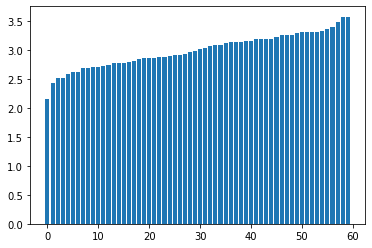

In [34]:
plt.bar(range(len(mean_ratings)), mean_ratings)

Visualization of our <b>Gausian distributed</b> data. <br /> <br />
We can see, that our dataset is almost completly gausian distributed. Not only does this mean, we have a good dataset, it also makes our machine learning task easier. This is because gausian data is simpler to work with. 
<li> It's mean, median and mode are all same
<li>The entire distribution can be specified using just two parameters- mean and variance


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


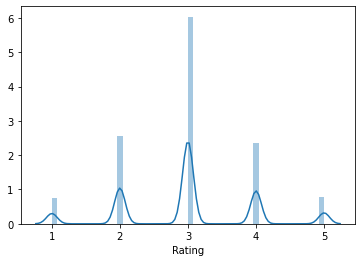

In [0]:
import seaborn as sns
sns.distplot(ratings.Rating)

We have specifed our image demensions as 350 pixels X 350 pixels matrix. <br />
We specify the directory, where our images are located.
<br/>
Because we are dealing with colored images, we are using thee input channels for each color in the rgb spectrum (red, green, blue). If we had a greyscale image (like a black and white photo), we would use to input channels.

In [0]:
img_width = 350
img_height = 350
channels = 3 #RGB
sample_dir = 'SCUT-FBP5500_v2/Images/'
nb_samples = len(os.listdir(sample_dir))
input_shape = (img_width, img_height, channels)


Here we are creating our labels, which are generated from our original <i>ratings</i> dataframe. We want to do some preprocessing, to make the data more compatible with our model. Here we are doing two types of feature extraction, where we are iterating over each of the filenames (representing each of our images). <br /> Here we want to find the most commen score and the mean of the combined score. This will help generalize the data, and will help the model from overfitting during the training phase. <br/>
First we creating a list of dictionary object, which is then turned into a dataframe, which we will use for our cross-validation. 


In [19]:
file_names = ratings.groupby('Filename').size().index.tolist()

labels = []

for file_name in file_names:
    df = ratings[ratings['Filename'] == file_name]
    count = Counter(df['Rating']).most_common(1)[0][0]
    #returns a list with a tuple, the displays the most common ratings for each file 
    #We use the Counter object from the collection module to achieve this task
    score = round(df['Rating'].mean(), 2)
    labels.append({'Filename': sample_dir+file_name, 'most_common': count, 'score': score})

labels_df = pd.DataFrame(labels)
labels_df.head()


Filename  most_common  score
0     SCUT-FBP5500_v2/Images/AF1.jpg            3   2.33
1    SCUT-FBP5500_v2/Images/AF10.jpg            4   3.43
2   SCUT-FBP5500_v2/Images/AF100.jpg            3   2.90
3  SCUT-FBP5500_v2/Images/AF1000.jpg            4   3.97
4  SCUT-FBP5500_v2/Images/AF1001.jpg            4   3.73

Seed is used for getting reproduced the same data each time. When we incoorporate the random state from the <b> train_test_split </b> function in SkLearn, this will ensure, that we get the same split of traning and test data, each time our code runs. You could say that it ensures, that the data is <b>derterministic</b>.

In [20]:
seed = 29 
files = [sample_dir+i for i in os.listdir(sample_dir)]
#ten fold cross validation.
#We divide our data in 10 "blocks", where one block
#will make up the testing data
train_files, test_files = train_test_split(files, test_size=0.1, random_state=seed)
print(len(train_files))
print(len(test_files))
print(train_files[:5])


4950
550
['SCUT-FBP5500_v2/Images/AF588.jpg', 'SCUT-FBP5500_v2/Images/AM1361.jpg', 'SCUT-FBP5500_v2/Images/CM77.jpg', 'SCUT-FBP5500_v2/Images/CM279.jpg', 'SCUT-FBP5500_v2/Images/CF367.jpg']


Here we are defining a function, which is going to generate our x and y features for our dataset. our x feature (input feature), will be the images, and our y features (output features), will be the scores. <br />
We first define the shapes of our features. <br />
our X_feature will be a 4-dimensional tensor, which will contain the batch size, the image height and width, and our input channels, which will represent the RGB scale. <br />Then we mark the y_label as a one-demensional vector / numpy array, which will be the score. <br />
Then we use the imread function to read in the image to fit our data structure. Then we yield each of the features, which will return a generator object.

In [0]:
def custom_image_generator(files, batch_size):
    NB_BATCH = len(files)//batch_size
    while True:
   
        for i in range(0, NB_BATCH):
            X_feature = np.empty(shape=(batch_size, img_width, img_height, channels), dtype=np.float)
            y_label = np.empty(shape=(batch_size, 1), dtype=np.float)
            #loop all image current patch
        
            for k, j in enumerate(range(i*batch_size, (i+1)*batch_size)):
                X_feature[k] = imread(files[j]) / 255.
                y_label[k] = labels_df[labels_df.Filename==files[j]].score.values.astype('float')
                
            yield X_feature, y_label


# Build Model

Define custom load

Load pretrained ResNet50
<br />
<br />
To elaborate the <b>Dropout</b> class from keras is a way to drop neurons during the training phase to put emphasize on the neurons, that have more impact on the output.  At the beggining of our training face, we did not use a dropout, and we performed very poorly during the training phase. [See this refrence](https://docs.google.com/presentation/d/18BcievZBg7wX7nUplPX4-D5Y43wEMxLujoLfR6G2-gE/edit?usp=sharing).

 <br/>
 We initialize our Keras model, as the <i>Sequential()</i> model. This is a standard keras model, that can accept multiple types of layers and chain them together.
 <br />
 We load in our Pretrained ResNet50 model from the keras library. 
<br >
Out out put neuron in this case is just a regular <i>Dense()</i> Layer from keras. From the documentation it states. <i><b>Dense implements the operation: output = activation(dot(input, kernel) + bias)</b></i> <br />
This is how we ususally calculate the acivation of a given neuron in linear regression, we take the dot prodyct of the inputs (in this case previous activations, and the kernel, which is the sum of the weights, and then we add a bias. In this case we do not want to use an activation fundtion to transform it.

In [23]:
resnet = ResNet50(include_top=False, pooling='avg')
model = Sequential()

model.add(resnet)
model.add(Dropout(DROPOUT))
#model.add(Dense(NUM_CLASSES, activation='softmax'))
model.add(Dense(1))
#free the weight of restnest except the FC layer
#model.layers[0].trainable = False
print (model.summary())


94658560/94653016 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


Above the summary of the model is specified. We have the first layer, which is our pretrained <i>resnet50 model</i>, and then our dropout layer, where we in the end have our single output neuron. <br/>

As you can see, the <i>resnet50</i> model has 23587712 parameters. 

# Optimizer definition

Here we are setting our options for the optimzer, which is applied, when the model is training. We have previously worked with Gradient Descent, but for this project i decided to use the <i><b>Adam</b></i> optimzer, which is a version of the <i><b>Stochsatic gradient Descent</b></i> algorithm.  <br/>

Since we are using a deep <b>CNN</b> we will have a lot of input features, and this means a lot of computation during our backpropagation phase. Using a regular Gradient Descent the computation would be almost impossible.  

<b>Stochastic Gradient Descent</b> will sample random inputs and apply the gradient descent algorithm on those. This is especially useful, when we have <b>Redundant data</b> because the seperate data points will have less influence. 
<br />
We also have a callback list which is a list of callback functions, that occur during the training process. <br />
We have a checkpoint function, that saves a model after each epoch. <br />
We have a function, that reduces the learning rate, whenever the model reaches a plateau. This means, that whenever we can't reach the global minima during the gradient descent process we will reduce our learning rate. <br />
The last parameter is an EarlyStopping parameter, which will stop the training process, if the model did not improve after three epochs. 

In [0]:
filepath="mse-{epoch:02d}-{val_loss:.4f}.h5"
#verbose will display the progress bar, when the model is training

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#this is hyper parameter turnig that reduce the learning rate until reach min_lr

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=1,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
#define EarlyStopping that monitor the validation loss after 3 epochs, 
#the validation loss is not improved, the training will be stopped
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=3)
#during training we can use callback to handle 
#during training ve can use checkpointm reduce learning rate and apply early stoping
callback_list = [checkpoint, reduce_learning_rate, early_stop]

#compile the model chose which optomizer used and loss function
model.compile(loss='mse', optimizer=Adam(lr=0.0001))




# Train Model

<b>val_loss</b> is the value of cost function for your cross-validation /testing data and <b>loss</b> is the value of cost function for your training data. <br /> <br />
On validation data, neurons using the <b>dropout technique</b> does not drop random neurons. The reason is that during training we use <b>dropout</b> out in order to avoid overfitting the model. During calculating cross-validation, we are in the recall phase and not in the training phase. We use all the capabilities of the network. And therefore train on the entire dataset.

In [0]:

history = model.fit_generator(generator=custom_image_generator(train_files, BATCH_SIZE),
                              steps_per_epoch=len(train_files)//BATCH_SIZE,
                              validation_data=custom_image_generator(test_files, BATCH_SIZE),
                              validation_steps=len(test_files)//BATCH_SIZE,
                              callbacks=callback_list,
                              epochs=20)

# Plot training result

In [0]:
plt.rcParams['figure.figsize'] = (6,6)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.title('Training loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.legend()

plt.figure()
plt.title('Training validation loss')
plt.plot(epochs, val_loss, 'blue', label='Training validation loss')
plt.legend()

plt.show()


# Make Prediction

Load model

In [25]:
!ls

image10.jpg  image5.jpg  image.jpg			 mse-13-0.0591.h5
image1.jpg   image6.jpg  mmod_human_face_detector.dat	 SCUT-FBP5500_v2
image2.jpg   image7.jpg  mmod_human_face_detector.dat.1  SCUT-FBP5500_v2.1.zip
image3.jpg   image8.jpg  mmod_human_face_detector.dat.2
image4.jpg   image9.jpg  mmod_human_face_detector.dat.3


In [0]:
from keras.models import load_model

best_model = load_model('mse-13-0.0591.h5')


In [0]:
#from keras.models import load_model

#best_model = load_model('mse-13-0.0591.h5')


make prediction

In [28]:
test_pred = best_model.predict_generator(generator=custom_image_generator(test_files, BATCH_SIZE),
                                         steps=len(test_files)//BATCH_SIZE)


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


In [0]:
y_test = np.empty(shape=(len(test_files), 1), dtype=np.float)
for i, k in enumerate(test_files):
    y_test[i] = labels_df[labels_df.Filename==k].score.values.astype('float')


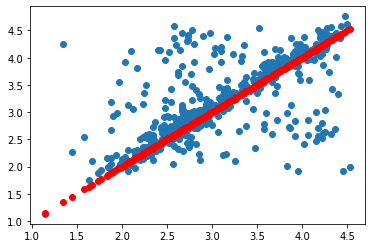

In [30]:
plt.scatter(y_test[:test_pred.shape[0]], test_pred)
plt.plot(y_test, y_test, 'ro')

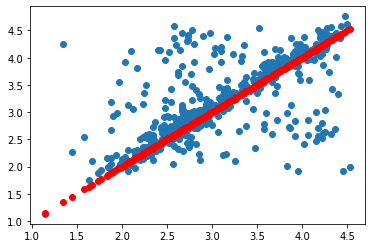

In [31]:
plt.scatter(y_test[:test_pred.shape[0]], test_pred)
plt.plot(y_test, y_test, 'ro')


Below we plot our predictions in respect to our input data. This will help us visualize the training process, and see if there are any epochs, that went better, than others. It also allows us to validate both on the <i>loss </i> and the <i>val_loss</i>

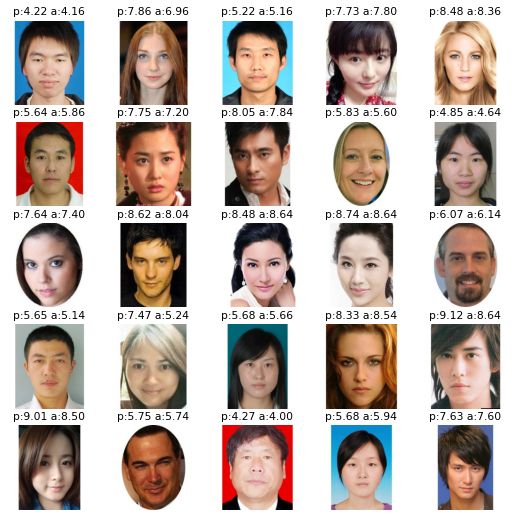

In [32]:
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (9,9)

from random import randint
nb_test_samples = len(test_files)
nb_rows, nb_cols = 5, 5

def check_preidction():
    for k in range(nb_rows * nb_cols):
        i = randint(0, nb_test_samples - 1)
        x = imread(test_files[i]) / 255
        y = labels_df[labels_df.Filename==test_files[i]].score.values
        predicted = best_model.predict(x.reshape((1,) + x.shape))
        plt.subplot(nb_rows, nb_cols, k+1)
        plt.imshow(x)
        plt.title("p:%.2f a:%.2f" % (predicted[0][0]*2, y*2))
        plt.axis('off')

check_preidction()
#model.layers[0].trainable = False

In [33]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2020-05-28 16:50:33--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2020-05-28 16:50:33--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.4’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.05s   

2020-05-28 16:50:33 (15.0 MB/s) - ‘mmod_human_face_de

It is better if we crop the image to get the head (or face) because the the image for traning is just the head with full face.

In [0]:
import dlib
import cv2
import numpy as np
model_path = 'mmod_human_face_detector.dat'
cnn_face_detector = dlib.cnn_face_detection_model_v1(model_path)

We should change shape of the image for using dlib. it is a powerful libary for predic face

In [0]:
from urllib.request import urlopen
def make_good_shape(image_resource, from_url=False):
    if from_url:
        orgiginal_image = urlopen(image_resource)
        orgiginal_image = plt.imread(orgiginal_image, 0)
    else:
        orgiginal_image = cv2.imread(image_resource)
    if orgiginal_image.shape[0] > 1280:
        good_shape = (1280, orgiginal_image.shape[1] * 1280 / orgiginal_image.shape[0])
    elif orgiginal_image.shape[1] > 1280:
        good_shape = (orgiginal_image.shape[0] * 1280 / orgiginal_image.shape[1], 1280)
    elif orgiginal_image.shape[0] < 640 or orgiginal_image.shape[1] < 640:
        good_shape = (orgiginal_image.shape[0] * 2, orgiginal_image.shape[1] * 2)
    else:
        good_shape = orgiginal_image.shape[0:2]
    #New we have  new image with better shape
    new_image = cv2.resize(orgiginal_image, (int(good_shape[1]), int(good_shape[0])))
    return new_image

In this cell, we try to scale an arbitrary image, into a format, that is better suited for our model. The problem is often, that a lot of portraits have a background, which can give a bad prediction, because it will add some 

In [0]:


def predict_drop_face(imgage_name,from_url=False):
    if from_url:
        new_image = make_good_shape(imgage_name,from_url)
    else:
        new_image = make_good_shape(imgage_name,from_url)
    detections = cnn_face_detector(new_image, 0)
    print('detections',len(detections))
    fig=plt.figure(figsize=(8, 8))
    columns = 1
    rows = 2
    
    for i, d in enumerate(detections):
        face_location = [d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()]
        face_location = [i if i>=0 else 0 for i in face_location ]
        
        offset_1 = int((face_location[3]-face_location[1])/3)
        offset_2 = int((face_location[2]- face_location[0])/3)
        if face_location[1]-offset_1<=0 or face_location[3]+offset_1 > new_image.shape[0]:
            offset_1 = 0
            offset_2 = 0
        if face_location[0]-offset_2<=0 or face_location[2]+offset_2 > new_image.shape[1]:
            offset_1 = 0
            offset_2 = 0
        
        #croped_image = new_image[face_location[1]:face_location[3], face_location[0]:face_location[2], :]
        print(face_location[1]-offset_1,face_location[3]+offset_1,face_location[0]-offset_2,face_location[2]+offset_2)
        croped_image = new_image[face_location[1]-offset_1: face_location[3]+offset_1,face_location[0]-offset_2: face_location[2]+offset_2,:]
        size = min(min(croped_image.shape[0],croped_image.shape[1]),350)
        resized_image = cv2.resize(croped_image, (350, 350))
        normed_image = np.array([(resized_image - 0) / 255])
        predicted = best_model.predict(normed_image)
        print(predicted *2)
        fig.add_subplot(rows,columns,i+1)
        plt.imshow(normed_image[0])
        #cv2.rectangle(new_image, (face_location[0], face_location[1]), (face_location[2], face_location[3]), (0, 255, 0), 3)
        #cv2.putText(new_image, str('%.2f' % (out)), (face_location[0], face_location[3]), cv2.FONT_HERSHEY_SIMPLEX,
        #                1, (0, 0, 255), 2)
    

    #new_face_image = new_image[face_location[1]-offset_1: face_location[3]+offset_1,face_location[0]-offset_2: face_location[2]+offset_2]
    #final_croped_image = cv2.imwrite('out-'+image_name, new_face_image)
    
    

In [57]:
!ls

image10.jpg  image7.jpg			     mmod_human_face_detector.dat.3
image1.jpg   image8.jpg			     mmod_human_face_detector.dat.4
image2.jpg   image9.jpg			     mse-13-0.0591.h5
image3.jpg   image.jpg			     SCUT-FBP5500_v2
image4.jpg   mmod_human_face_detector.dat    SCUT-FBP5500_v2.1.zip
image5.jpg   mmod_human_face_detector.dat.1
image6.jpg   mmod_human_face_detector.dat.2


detections 1
636 919 260 543
[[5.710962]]


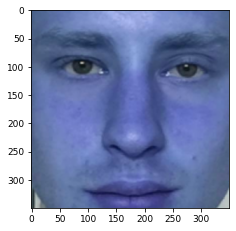

In [60]:
#drop_face('https://pbs.twimg.com/media/DYAfnOoWAAA3T7D.jpg')
#Here you cna upload your own image to your colab notebook and get your prediction.
predict_drop_face('image.jpg', False)

detections 1
137 608 123 594
[[6.213377]]


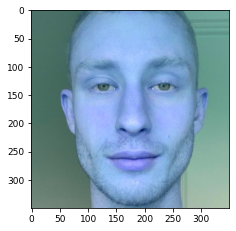

In [61]:
predict_drop_face('image1.jpg')

detections 1
228 717 129 618
[[5.875818]]


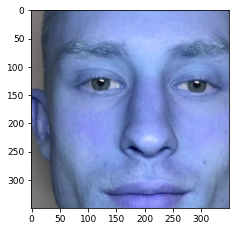

In [62]:
predict_drop_face('image3.jpg')

detections 1
163 840 3 680
[[5.1867337]]


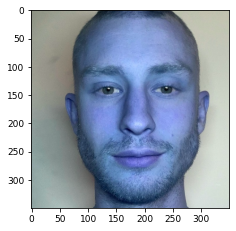

In [63]:
predict_drop_face('image4.jpg', False)

detections 1
115 442 26 352
[[4.5313387]]


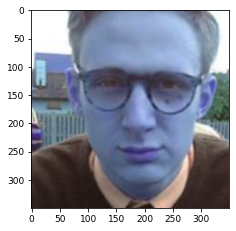

In [64]:
predict_drop_face('image5.jpg', False)

detections 1
228 717 153 642
[[5.6234946]]


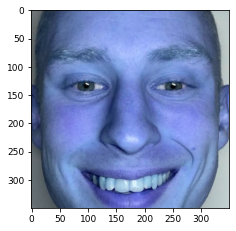

In [65]:
predict_drop_face('image6.jpg', False)

detections 1
611 1101 110 599
[[5.3049903]]


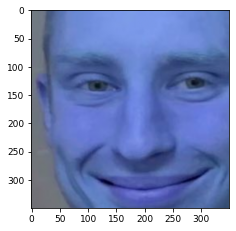

In [66]:
predict_drop_face('image7.jpg', False)

detections 2
65 392 70 397
[[5.37012]]
85 412 568 895
[[6.991167]]


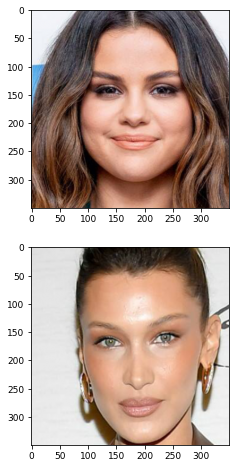

In [71]:
predict_drop_face('https://akns-images.eonline.com/eol_images/Entire_Site/2019105/rs_1024x759-191105151402-1024x759-selena-bella-gj-11-5-19.jpg?fit=inside|900:auto&output-quality=90', True)

detections 1
79 471 118 509
[[7.0616946]]


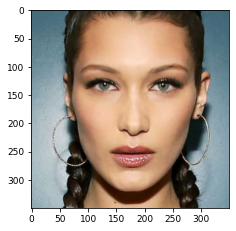

In [75]:
predict_drop_face('https://i.pinimg.com/originals/ce/ae/41/ceae41a8012e2b0636e98b5d1ec51d6d.jpg', True)

detections 1
51 522 256 727
[[8.50662]]


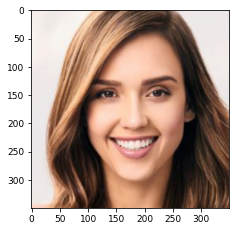

In [77]:
predict_drop_face('https://www.caa.com/sites/default/files/styles/headshot_500x500/public/2018-08/Jessica-Alba_Web.jpg?itok=uV_039qI', True)

detections 1
177 857 60 737
[[5.3718486]]


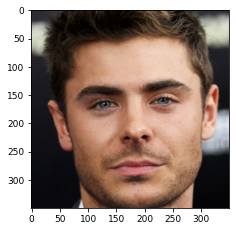

In [79]:
predict_drop_face('https://resizing.flixster.com/p7dfmh4QdCwHdtgtzu2zYvwuBLs=/1000x1500/v1.bjs3NTMwMDI7ajsxODQ1ODsxMjAwOzEwMDA7MTUwMA', True)
#background is setting score lower, because there is a lot of background noice. The image cut is not perfect..

detections 1
105 670 900 1466
[[7.648298]]


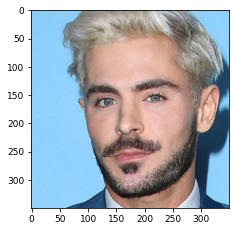

In [80]:
predict_drop_face('https://www.refinery29.com/images/9111669.jpg?crop=40%3A21', True)
#much better and more precise. 

detections 2
67 224 367 524
[[7.5117006]]
58 214 175 332
[[6.6203356]]


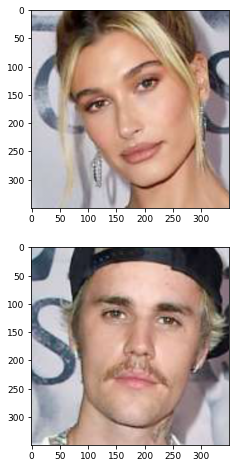

In [81]:
predict_drop_face('https://img-s-msn-com.akamaized.net/tenant/amp/entityid/BB14FM6o.img?h=0&w=720&m=6&q=60&u=t&o=f&l=f&x=441&y=180', True)

detections 2
127 518 870 1262
[[6.503621]]
389 781 440 832
[[4.4423013]]


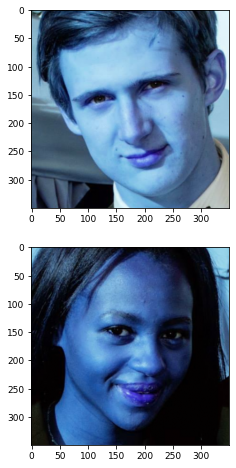

In [82]:
predict_drop_face('image8.jpg', False)

detections 1
97 489 309 701
[[6.40032]]


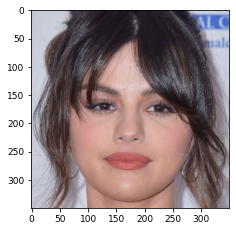

In [83]:
predict_drop_face('https://bloximages.chicago2.vip.townnews.com/madison.com/content/tncms/assets/v3/editorial/c/a2/ca2eeace-96f5-5f1e-adf3-6df5d1df62de/5e64054290da9.image.jpg', True)

detections 1
52 867 244 1059
[[7.371923]]


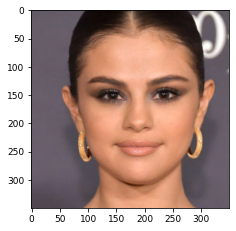

In [89]:
predict_drop_face('https://i.insider.com/5a11e54191533235028b4a6a?width=750&format=jpeg&auto=webp', True)
#without hair in the picture, we actually get a pretty accurate prediction

detections 1
81 308 73 299
[[3.6642628]]


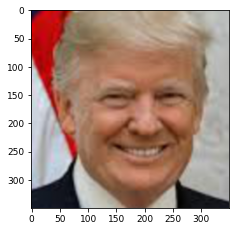

In [90]:
predict_drop_face('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSExIVFRUXGRcVFRYVGBUVFRYVFRUWFxUWFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGi0lHyUwLS0tLi0tLS0tLS0tLSstLS0tLS0tLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0rLf/AABEIAP0AxwMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAABAgMEBQYHAAj/xABBEAABAwEFBAUJBgUEAwAAAAABAAIRAwQFEiExIkFRcQYyYYGRBxMjQqGxwdHwFDNSYnKCJJKy4fEVY6LCQ4Pj/8QAGwEAAgMBAQEAAAAAAAAAAAAAAQMAAgQFBgf/xAAsEQACAgEDAgUDBAMAAAAAAAAAAQIDEQQhMRJBBSJRsfATcYEjYZHhFDLB/9oADAMBAAIRAxEAPwDNL2fWbY7NSqDYM1aTjnsuEFo7M/coqzlS161KzbHZqNRuwZq0nHM4XCMIPDOfBRFDULpabeJTULD4xsvYn7uvjzNjtFBuT6z2gn/bAzHfooVqWtFBzHOY4Q4ag+PxSA1WlRSWxnyDKkuj9fBaqD5iKlMk9mISoxyXos3qrjnYJafKZfYtFufgdLKYDWxoT6xHsHclegV81HWunSqPJGBzGk9aMiATvVNqdZPbltXmrTRqcHCeRyPvWW6tKrC7Da95pepv7RlxRxThsEItHc6dRKE1Z0zXOGgWbII1YiELWojxJhEgtS0CQtrI2gnjAEjbWAgCVCCVClOZS9TQoLM3I5o7wFCCdnGUoLUYGSTpk6cEeoJChBF1IBs70DjAThrwcki/JQhFXi6RwVBvHrP5q/25snMwqBePXqRxS7OC8OSOstXaeNcjkj3LrpHYmllqS52HItae8p3cziczqstiHImGnaP1xXIGan64rktFin3rWrCx2alVbsZ1KTz+Bw6o7M/cou7/ALxg/M3+oKWvCrWFis1KqPRkmpSecyGnItHZnPgrF0Us11MqMc+o6rUyIDhhaD2DevRU2KNeX+5ivj5sYxsvYnOkfQmpbLU19MtYzA0VXO3EaQ3eSPcqh05uiz2Oqyz0XOe9rZqucd50EDILZaFNxcKzBDXjIcI0JHBYL0kZVFpree+8xux+OR5RCmnnKezeyFTSRHhOGuTdiPK28JCw1XUKTuG46trrNpUxmTJO5o3uKZ2WhJz+u1bz0LuSjZqDfNnE6pBc/eZ+CxW2pZiaY1SjFTa27BqVmLAGOdOEATxhOWJa2UdXbpITdpjVc7GC2cijSjsYkTWYDJcB3rheVIeuOe5TKJgetMJo9+IzuXfa2uGy4GeCFgyUIdSeA7mnT00qNTim7IFEgk4ZygLtyWeE3LTKhAlRu8GCkjXI6wR3NQinkoQj7c5pbms8tYGN/CfgtDt5bBGpWc285v5lLt4L18kPZHgecLNRMzxT25KhcSXaplZX4RUMdqf3G+STETuWWwdElmb0CCkdc0CoglUvGpWbYbPSqNmmSatFx3AiC0dmenaoy7qRdWpNGpe0e0KUtlWsLDRpvbNNzzUpOPqxk5o7M/aoqy2h1Ooyo3rMOIcwvR1bxf5MV20ltjZexqHSnp3Vstpp0rOWltFobUB0cSBl2Qqv04vujbXMrspmnVIw1RlBjQgqsPrF73PcZc4lxPEkyUrTO5PqpjBJ9xEm2xundks5doEWy2cudG7ep2hTDRAWDX65V+SHJ3vCfCHqP1LNo+/z1E20gxh4xmVq/k0vTztma1x2qez3bj4LKrS0lsDfkrhcFM0GbDoJEOI3+K49NslPqe/qdbxmFUaVWljGMF/vK82CngAJfM9gneSoI1ahGaaUqs5kyn9E5J0puR5tRSC/ZgQm5sm6FJt8friityOirgsmRzLDvHgh+zuB2S4ciVJABpPA+9I1iZVcYDyDYbe9pwv2hxOvipPzwUXTZJ4KSZRDmxv3Rqmwkxc4ocMq5IodkUzBIMTknuUJyYpiWqCq5KNSFQKwBheENByzWdWrMv8A1FaDeRyPJZ9WOZ/UUm7gbXyQ0gB8juT24+IySd4CA4pe5hkss+ByHgOv1wQLmHXL6yQKIDK1aatZthp03tmk95fScfVIycBzUMFMV6lZthYxzZpPeX03H1S3JwHNQ4Xo6OH92Y7lhrbGy+fO4emFcbj6E2irZ3WgjC0DE0EbTxvgbgjeTPo221Vy6p1KUEjc524Fbc6k2MOjYiOzgq33PHTErViMk2snn+jTa2QEqCpTphd3mLQ8NEMftM5E5juPvUO05LzE0+p9XJ9IothOqLhxjYcUGOc5oaJJIPcDOatwyBHh8pUJdlhgMeTBInLczcO/I9ylRVI3SO3+ydWsRPMeLXqy/Ee235FqVoMqRoWk71CPrj8IHbKcUC45/NFs5yiWChaD3J81wOqgKNc9vtT+z2uN8diKkWdbJGpTjtG/+4QYcsoITYWvhIPZBSVSuAZBwniMvFu9WbQOhj9oI9WfYf7pOtahxLTuPzTVt5Ees32g+EQm1a8A6QQO5TqQOhjireZB2oPBw3qTsNrD+Srbg1wnt+pU5dlhwjgU2tvImxJEi1wzCK53FAW8UR7sk8SML0YC0x2rOquv7j71oF5dUkcFn1U5j9R96TcNrGd4nJ3cnN0Nhqa285O7k9u3qdyyS4HIUbMGFyBpyXIoDK5Uq1m3eym9s0qlTHSd+EtMOA5/EpXol0Yq2yphaIYDtPOg7BxKfdHqTn0KNnrgiz1auJj8tggw4DhPxK2q6Lsp2emKVJoDWjx7Sd67cbcJpepnurcemTWMr589QnR+5KVkpCnTEAaneTvJKfVxIS25ELUtiSn+UW68dmFYa0vEg6rLWnjxXoC02dtRhY4S0tII55LCryu80ar6bssLiM+G4+C5ushiXV6nrPAdR11ul9t/w/79yyWA4qLDwa1v8oAPuT2zWeQSch7f8olks4wtLdC0EQRhEjPt1ncpCk3j/n+yCWyONa07ZNerI42NHpUiN6fPqTwRKVImUpjooAGUJP0UecOvxQis0quRqgNXz9SknP3Z96fOYOKTLmhDIcDMlw3/AF2Li/T696We7FoCkqjNFMlGkC6qW0y4HRXOy1A5jXDeAfESqIXAy09U6jsnNXum4QI03clspOddyGqOSFaYSrkhV0TxJEXpULWHLcVRqpzHMq93oJYeSolcZjvSbhtYwt2juYUhd/UPJRludsH9QT6wO2O5ZZDULNdA+u1CkyTGX1quRQBlQtVRtlNItPm3ODqTvwvadqD2rWehV7/abM0E7bNh/bGhPNZRZrZUbZnUnsLqTnA03fgqDWD2hTHQW9fMWlrSdmrsngD6pTqrOmaz3O7q9IrdPPCw4ttf19/c2KufkihJVniB2lKkroHlRwxggLNvKtde2yu0QDFN57dx9471pLDkFHdI7uFezPpHLE0meBGYISrodcWjXotR9C6M+3D+zKHZKrMDCMMhg0Gg3YRwQguPf3+1Q90SaYn1GuY4b8TX/IqVuW1CoHQIwkjmBvXPjLq2N19X05tokWsEAIjKobJd3fFdUedBHL4qLt9mrOIBdhbvc3M924IFd+w/dfQHqOI5fEJvaL0on1cJ3/24qHdcLZn7VU5F+XtSf+lF0sbVJHjHZKLIskpSteLQzuSbrwa0569ql7ju9rWwQJVfvm6HOqOc15AyBA7yVRR9R0m8D+le8mMJA45J2S1wyEKt2To9Z8Ul7y7hLvdHapSjdfmpcxzsJ0a4kyew5kcldtCMMQOTjzMq73ZVx0abogxB5jI+5VCgzG8DeXQeY/yrrZpaxrQIAH+U6ky3hw+dER5QgBEc1aDOQl+1zgKpFrqQAVdr9Gw5UK1P0SLew2sZWl8s/cpCxHYUbXjBH5lI2TqLPIahach9cVyDcFyKAN7Dbnss9Sk5mKlUIwn8FUZyDy9yZOftAjdmOe5PrvtdRlnqsczFRfsz+CqM2uB3KObqVWXCPYULEpLHf/iNu6MW4WmhTqnUDCR+YZFSznZlZ55Mbywl9nJ6wxs57x7lfqLIymTv5rpUT64JnkPEdN/j6iUO3K+zJF3VCYXjUMBvEgdye1twUVa6npQOAJTGYkUu8bEKVprt9V+GoAOJkPjwb4o92WfzfoyNQXSO7Xt+al76YMArYZLCXGBJLT8oB7lFUbbTeWgOlxzyzEQc54Lm2R6bPudeE3ZVl9tv4D18hrqcuEJ1RoNdqVHvdJz0+ASH+ogHVKky1a7ErXuijqWg/XYo6vWo0nNaCGzoAFHW++zoMzuCaWWuKDjWq7eIQMsmxqPd4KZyMexeLBTBzByUVeFRjDtnInI/NEsN/UnUwQYG7sTa871pOmnGPE2CPj2Itpg43JOzspkSIKStMCY0VPoW19F+Ek4dx+BUt/qOLJUZZtND65aJNZjt2LF4Nkz4K0vrqK6OcYyDS2e2d3d71JlsSdVsoWInM1DzLAvI1SVVwCBpMAjREqiSE8zkJfbwWOhZ/eQ0HYr90nbDZCoV4HNqTbyNr4GdWmGsA7VJWXqKPtR2W81I2XqLNIahYuMD63LkDhMfW5coQXuBpNCqzC/A9pxyBhkRhe0ngoBogkcCR4KVuura3Ux1zSaDAIhuHfzChmHa71J8HqtM2rG3jf8Af8fglbBanUqrKjdWEHmN48Ft91WhlVrarSMJAPisJGhV+8ll546bqLj92ZbJ9U/3TdJPEuky+P6frrVq5XsaE50nkoeqZqO5QpGlUlrncTko2hnUK3vseTQ9NIYSI1EeKzGyh1ntb6BOyCY5HNsePsWr4QqJ0zu3+PseEw6s7CQInCzac7kGz7EjUwbSa7HQ8OvhDrhZw0/5XA3c7ZPNQltpudIbqn73lhew6gwR2gwUkw5rDIdAr5tTKOb2ujTHBIntI0UubXSqN1H1/hSNKyiMwCDxGRXWSzUWGBsaGCJZkZyB07lFhlsSK7UsbScnDuS9HzbAXOdkNSATx+R8FYy1gLSGUTBJ4TM/NIXgW1AGOwkCNlohp16x3ja0RwvUr5vQgftDK7dlri13VcRhntAO5OLNZw1oPrRBG6U9LNIEAJIU8Tmsbq4gDmVR78FuC9WCn6Ck4HPA3+kJfGdC1Ep0S1oaNAAByAgI+JwXRSwjlN5eQgaQIQO2Rqi1KjtybVG7yZRQCH6RVZYVRbaNpvJXfpB92VSbUJqAdiRbyOr4GNpdstHaU/s59GmFp9Uc0/onYWdjEOWnT63LkIboOxcgyDu4rTTFFoayv1XSXO2Ad5aJzCq1R81HHLXdorN0du9xoBwcJwuyIeY3aaBVbCQ9wMTJmNEyf+p6DSv9Xn5ljsuyKmfJ7bPN2psmA+WHv09yg6p2Sj3a/CWuG4tPgZSYvp3OpfX9bNb7pm/1CAwACBuTCxj0hSVqveixjKlSqxjHNBBe5rRmN0nNVC3+Umy0S/zTX13HQjYZ3udn4Arsc4Z8/lFptM0C0WlrGue9waxoLnOOQDQJJKznohev2++a9pzwU6WCgHZFrC4AGNxMPP71SOknTC1WzZqPw05nzTMmZaYt7u89ylPJBa8F4YTpUpub3tLXD2ByEtwJYLv0zu0sf55o2XRi7HceR96hLKQR+YZrTbdRDmkEAg5EHQqgX1crqJx05LN41LfmFhtr7o2029mOrNUa8ROaGrYGvyKrv2oghzTBT2lfB35LPg2xkh4bhHE+35rmWAD6hEbfY4/XYmlS9icm+1DGS7aQvayJwN7+xPui9jl5rkZNltOd59Z3w7zwUI9lU0K1VjZFNj3ucdHFrScI4lK9Dum1ndQp069QU6jRhJcMLHQcnYtASImYzlaKq98mK+3bpRfjWRXuOoTenVDhLSCDoQQQeRCEPhacmIUYcWohNa9ONEtVdmgrGQrEKz0i+7Kplbr9yuPSknAVULW2CHcQs93I2vgjrY7q96d0n+jKjbydBYlhW2IScDMj99ozEcFydWKyNIBDmzHFcrYQB7dPSGmxmA03tgOaS6o4tn4BVu8agNQunJ20NNDxA3qOdXcd55bvBJytX+PnZs1LxLoadcf5z7DqvaxEAJt9odoHEcskmUBTI0QjwjNd4hqLXmUn+NvYFxkyTJ4nMohXSiseD8RvTMGMAp5cdv8As9po1weo9pP6Zh3/ABJTVyTe3JDAT1FSqBzQRvEpnaaMqE8nV5GvYqTiZc0YHfqZsk98T3qzlspM4hiyg35cWr6Y5t+XyVXrsWuV7NKz3p6aNEgNPpnRsCIAOjncOzikOtt7GqFqS8xX6XBWG4rkNYhzpDN+4u7AoHovbKLqwbaJaD1XAej/AHnUeEDetco2cNAAEAIfTae4ZXJrykfedmAstWm0ADzVRoA0EscvOlmcvR991g2hVP5Hf0lebqOifEzMlbtvWvQM0ar2cQDsnm05HvCt12+Uiq3KtSbUH4mHA7wzB9ioocua5MwVNhu7ptY6xALzScd1UYR/OJb7VY24YkGeBGYPIrz8FJ3Vflos/wB1Vc0b2naYf2nLwR6SZNJ6Tv8ARx2qnXk0YZB0yI7kpaOmJrU8FWmGn8TNDzadPFMvPNfnMDSRp3rLbF5yOrexH25uIsA4ZqauexNdAdm3eitsbSxxBEjSEWxtqgbLclTsWLNSuyyj1VygcVf8JQobhKogQShldMxAFFKM5FRCcAiPpA/Mao4KEoECwikI6KUCGl+RK8IfXsxOsVW/0P8A+nitfNFec+gV4eYvCzvmGud5p3Kpsj/lgPcvRdrtmBktbjeRstG/tcdze1Vksoi5K1076SNsNAloDq7h6Nh0G41HjXCOA104kYvVtmNznPcXPdtOJ1JOW1vMndkNNBGHRLVdJtFR1S0NxVTkZnIDRrRuaNyp3S652UajSyBjaXObOfARz2h49oMp5xgM+COc8NbOswOOg+tDPYdVonk2v81qbrNUdNSnmwkkl1KYAM6lpy5FqqnR26WWmoGPJHo8QEiXHZmMzIH1mMrFTuA2V7a9AHEwzmTmN7T2ESFNRs+kle6yWjpHRJoPHFpXnipSwPc3gV6PttqZWs3nGaEZg6tI1a7tCwPpNQwWuo39BHexvxlLii2dyMhHCUsdmdUqMpNjE97WNnIYnuDWydwkhHtVlfSdgqMLHcD8DoRyVkQSRgURCFdADozXkaFJygJUZCWsF54ZB3704pOxGRUIndKgcSNTrwZ8eSzzpT3QyNj7lqNOAPTnxXKOFnnfluXLN0jskNKOElKOCumjGc5dCEoEQBX5Z8PdvR0BQU+HD3IEBQFGKBQIQuIzaYIzB4EZg+K9N9FrYK9GnVGfnWMqTv2mgx3TELzKtw8jd4Y7CGb6FR1I/pdFRvdtkftUQGWe9rFDsQ1WP35bRVtdQnNpGBsH1RAyJ056STOySVuHSV+GzVamUtpuIJmAcJjTPwWAWmnFWffnnBmSJMxMkTIk5yZfUtuoXPnBYuijJt9CTHX7z5t/HPQ789564LtMZZuxZCy0upllVhh7CCDy3GMoOYIGRkxstIbsFw3gy0UmVm5YhmN7XDJzTyMoamHn6g1S2wMr0sWEHAIx5OG4xo7mPaO6MX8pNl83bo40mH2ub/1XoOtZ8Th2AlYr5Z7PhtdF34qbh/K6f+yzqOwzPmKRdlcU61Ko7RlSm8xrDHtcY7gr9efS+xWqyWim6mKVYtc5jXNDmF46ppvjZcQOA71nKEKjgmy6lg5dC4oVYByKUZFciwAInFCUDTkeaqWLZcDPOUG8Wy3w09hC5d0BqT52mfyvH9J+C5ZJrDHJ7FXcUoCkXlKArcZhRACulcArABRXcfqEZAVCAoEDOHD6CFAgC0byIW6LVXs5/wDLSD2/qou0721HfyrOSpnoXef2a32avMBtRrX/AKKno3zya4nuQCehullT+Bqn8vaPWG9uY5jPhmsVr0s+GkRHMCG5A5SAMspb1CDtPStv8FaBwE+0HUacxmsfezP5CRnHq7wThyyBOFuy8uW7TrMX9zPY9xDCMJ6umWRI0nQDSOzTQB7i02LyaXt5uv8AZ3HYqnZndUA05kAjm0KD79e85njvJcDnlLg4mC1pLEOLXh7XQQQQ7SCILCOAGyf0kZQmWwTRSL3PRBp6LF/LpR27O7gajfENP/Va9cN4i0WanXHrNkjg4ZPHc4FZb5bqfoKLv94jxY/5LBjlGl8oyAowRSjBLLgFCucuQIcUUoxRHKMIm8oAdkItQo25BBJvoXa207U0vMNc17T4Yh7WjxQKEZxXJUo5LJ4Be5LNKauOQSzSn5F4HAKEJJhRwVZADoEEoZRIFORnuPwRiucEDTkgA4orhIhGKBQJ6Luy8vtlzmrMufZyH5A+lptLKmTsjttORyWa1c88t5OccZlzv3S4/mLsy1ysHkYt/nLFa7ITmzE5o/JWYR/U1/8AMq/iymfYAZy5gHTiOqM6bTG3SvKaM9q3OI1mfDk0y0/taWn8lM/iTGtSzn2uMjVxMk5n15Op9IdTsvQPoOgCAfWOgALszoC5xlrmkIVaOvPvGgjCcwZDdkzBDGmS049UllCkaR5KrdNOtQJ6pD2jseIPtbn2lyhvLVT/AIJh4Vme1rx8U28nVrDLaxsiKjX08tJAxjPf1DB5mdsF0l5bG/wP/tp+8rn3RxJmiDykYW5GCK5CFmHHFCEBXSgyAojyhJSbio2FCVVKEg6pKohe5VQQ7ncFyK0IFUISUq0pAao7HKyYBwCjgpJpRwVdFRQFDKJK6UQCkosweaCVzkSBkCKHIZQIXLySXgaV5MZOzWZUpOG7qGo0+LAO9SRbh2dMOWkAYZ/DplJyzDZIzc5qo1y2/wCz2mhXmBTqMeY/CHDGO9sjvV9tQPnKgEmKtSMI/wB1xbhA4kSDvc3FkaYxbNI92hNy4Ep5TyAOUHQZawYEgGAJYHgELRpsjv7I1nTOJnSTOdMg+Lt9kCILtRoMMmRmGy8Zvc1A762RO4adXe3Z6slrepOHaIFbqtfmq9F8jZqUyTEbJcA6cssjp+kZAPDbX5cXxYmDjWYPBrz8FSbSThMHdlrrnvOe52Zzye7rRjnvLNeIqWOxQfvHCqOQpf8A0Cx6pcMdV6GRlCCirlhNAMoCUEojigwhy5JlyBAqNhCuKMxs57kR6MHTkFEQPK5AuQYRvKFqKUIUILtKVaU2BSzSrplWHJXAohKCUckFsS7EkgUZpRBgEHNHSL9R9apSVCHOEq7XLafO0g52Z0dwJhrXHCOtJgHjssEOIKpKsnRN/o3iPXjxpuPwI/cTqGkaNLLExdq8pYmz2zPEOMkkzI1OIEyNXNxD7tzSO7fHGQBGEnrbhhJM6BrnP0qEBB1TXIZTxg+jY/dxxAftBEEuJMauuWhJmc8jinSJna0jFBiAWno9SXz+jNhhqgP5+UZ6gdXjIaMPEMZ6jSYrp1eAqUbAyc6dGoDnJ+882DO+fMnPfqnlSqI6ojSJMRGGOUGORdvILaje9UuqmdwgdgJLj/yc496z6qScBlSfUMSulAUUrmmoElFLlxRVVsIK4lFlFeVVhAcUdJFKBFEBC5cFyBD/2Q==', True)

detections 1
73 299 73 299
[[7.391733]]


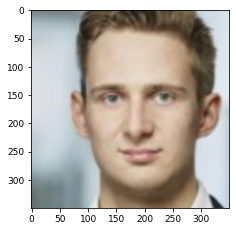

In [92]:
predict_drop_face('https://media-exp1.licdn.com/dms/image/C4E03AQEHmC1o-S_hUA/profile-displayphoto-shrink_200_200/0?e=1596067200&v=beta&t=M7gwB-dNA4zWjcz7zbLNj_NvMJIxWcBy6uvkucn-lGg', True)
#Seems very accurate ;)
#lower quality pictures, can make predictions very high or very low

detections 1
42 173 114 245
[[5.744223]]


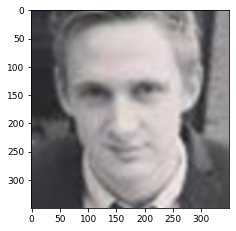

In [93]:
predict_drop_face('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw4LCg4ICwgICAcJCBYICwoKCxsIFQcKIB0iIiAdHx8kKCgsJCYlJx8fLTEtJSkrLi4uIyszODMsNygtLisBCgoKDg0NDw0NDysdFR0rKysrKysrLSsrKysrLTcrKysrKystKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAMgAyAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYHAQj/xABGEAACAQMCAwUFBQYDBAsBAAABAgMABBESIQUxQQYTIlFhMlJxgZEUI0KhsQckYnLB0UOi4RUzU4IWNDVFVGN0kpPC8SX/xAAXAQEBAQEAAAAAAAAAAAAAAAAAAQID/8QAGhEBAQEBAQEBAAAAAAAAAAAAAAERMSFBAv/aAAwDAQACEQMRAD8AwXELuaOZlEraCcgHxaabHxiZRjUjZGN1pcYH3o9QeuqoFUWacdlG+hPkStS7DijzSd3oAOnOc+VUQFT+CH96G3+GeVBZ8XLYiyR/vCQBmrCCUhQdXhEeTyqu4uBiPH/EIqxthmPGGI7roKKJDxq3O32pPg+V0/lUyK+iflcwny8Y/vWBkTDEY5MR+dIKPhRHS4pB0Zc7ey2/5VNghkk2U4Xlq1FRz/WsFwDhSSZuriSQWcZ2jjJVrxhzA8hyya2Vtxq4ULGtjbW9sgwit4yq+uNqiytLZ8HxF3L3ya2uDN4Cc8sYNGm4YyLlZgygcyNOqmcM414V7yzjcHZmt2Hh+R3qx+3pKMQoGDbd2QFLY546beXP0qNeM5KzjO4wOYwfD+derI56o2k7Z5NtyqynkhkYqSgce0mTGdPwNZPtDxK84bP3ZskubV/FFMAU1oeh6Aiql8XwuHH4TkYzvp0/KvBcufwuMg5wd/1rJWna55Z0tzYBGllESkP7DH5Vpow3KTQQQNoxpKtQ0i7ZOe8Ueg3oXfHlqOM5wc0riTR5lANxnSfpVJ/0ntCxXvGQq5AJQ4omrc3O2e9IAAGSSunf86C87H/F1EkkeIYb4AmoQ49aOMfakBGBkjTXj8TtT4ftcbDruG1UPBzMc+9jAwQMrivGmJHNlJ2ORvUYzRPvG6yIMnUPw/3pPImn2gNvM1Q/vjzy4HQZpjyk+6RnYEUPYjIbfr4zTCDz1fmKAsUmWwxx0pU2D28bHPmuqlQY7i27ocY2OfrUMCpvFz4k26nfPtVBBHkaIIi+mfhUzhCfvI3AxESKBZka+ZAxk/WrCyCtdIQMZtyTjw9atB+L4wmDn7w9NNT7Y+Ab4+7qDxc+GMYKgSHmKl23sg4BwoO9QZmdMux/8w/rTRCSdI3ZjgD3mowO7HBIMh3+dEjcBgcN4TmqLu2uXhUQRW4eSFRGGk8IRhzPwqTb8aljOuXiUcTjfRHEZR88Cg29q0umMMzJJ944PN/IGtPwTsrFIdcy6zz0gaQtRYqB2pnJ0yQWt5CTgSIhgK/Mbj41ccL4w0mR3MpTIw7+3F6Ejn6HnWstOz9rH7NvGNsHb2qs4OHwpssSActhWdWSsjxO4EqrJKveQr4nLLpaBwc/SoXEp5OI2czZjY24FzGq+6Mg79dsfStdxfhgKl48x+qD2Kq7Sw0FwVV9duY18GjW5yTnHmaaY5rw4d5xWHbOmTVy8hW6c55MFcHqNIrIcGiB4y4TJSJTjPPyx/StaU6+vpmtVIDcNojcnS5WEsdh5GuciNCMkZJ3NbzjLaLSUnOe5IyfF0x/WsKB+m1IU026e4D6ZoN3HGE8MbJIeTatQ+lSgaBfj2F6saI0XAITHZIcYViX5+dTZBq2yWyOo9qlZKFgRBnaMZx8KcTj3Rnnt7VFUXGIQWVftRtSgJPNteTjpUDupRsnFUbPIHNH4zJ+97jWsajKMdm64qBcXAkcusSQKeSR5wv1q4iyS1v18azo6qNWoHUFWvKrkuZFjdVmkRHXDKGKhvjXtMC4x7SdOe1V5FWPG/bT4mq81Aa1bDbjIKkVZ8LH70hGD+6nn8aqoR4sdMVbcIP7yOmLUjlq61cBuMABUwMfeHODqqXaeyN2GF6VG43nSmQuO85ipVgAY2J5iLK71Bl9R8yNyefrThI3vGguabiqN52bk1yBj/ww2Mb1u7EMN05GsFwJvvYpi2VlsQTjxaFGB/StEe1kFqwRhJjlqwF/Ks1Y2UTty5VMiDegrP8ADuPR3C95EQ457c6i3/bOO2YoYZHdN20nVoXzNTG9jXSDKEHqMVm34h3T6GzrWTRsN+dTOEdoorwBVjdHcAjUNPhPWo/FbdBeK7BgjYJK+9yolrn/AApCOM3p0shWUggnSVyf0rRn4k7cxVZZDVxS/fKsUnW1ywLamUAH9KtXPQ/LeqkUnad9Ni5zu7BTn41jQ5/hNarto+mzVBjMkwyB+LGaxYG1WJepYbfl9KbP47iNMeW1AXnzP1qVw5e8vlGc6fPxURrceAAbYXG400tIxtq1/wAR1flRZFHnzHPO1R5RzOpQoGee60VkeJSZuJDvtIR9KBAgkcJ3kcWrbXISoT4nFCklJZjk+JiaaHPoflVROvbRYodQvbS4ZpAuiElj8dwKVQ38WhMe03SvaglcX8ToARuxzj5VENv01D6VZ8RtXkdHWN2RWOoqNWmmNY43zKufegb+maCCIirZBU+VWHBgTdHONrY4wfUUNrbr3iZ/iUx/qKNwqL96I1AgW53Q+oqiTxxcRpuT97yJ1VIsD9y5wMdzv+dA43HpSPxFh3mBmpFkCbeQ50hLY7Y1atjUGTPIc87nl600HFWnCrRpBrwmll0LrH4qJFB97olhjVGGAVOrSwoL7sXMksQgdlW7tiQqk6e9hPl8DV/LwCOTfuUfUdZLe9WKu40jTMKqs6yBlIbSVwcmukWF2GiEgw+uMMMfiyKiwXslwhLadxpB7xclelWN32bjeY3CaVkb2gyhg61E4PfJFcYlLd8w1b8t+gq9luO9w0WpCpySw9v0qXdamHWVqI1AIXUuwwo8NVHanj1tYK+srJxARiWGAeI6uhPkKvIZNQ5YPWuWdvCbjj81jpEbmxTupGGnWcZ+YPLNJ0vC7GFpLaadyzy3F20jPnSWY7n9avn9nly86p+y1iYbURyMyXAlJaMOGC71csVXbVGueQNVmMp2zbPcRgZOWkbA/CAKzyR8tulXvbBv3uFB4SlsScep/wBKqANuXTFUvQtA22HPyqT2cj13rtj2TttQXGBnflnlU3smmWeTzY7500RpHG+5x8BvUDiMwjt5WAzpiIz8qnucebY/Dn2qqe0RYWjAoEaRwnPV1pFY9Bn86eEr1BpTPU+lOQEjODg9QNqqFAubhFxnTvSonDhquSdzgYpVBeRi71FIGd15hETvdK/DBohvLyM4dFVhvpkj0n8xUma7mtrGOSC4aDUwZtHhMrHzPWpHDuLTXttNBeEXQjXVFK/t20uOh8vMUXxXrxOfk9rA64xjGk/rTxP3ramt1t2XqpPjpkROeu+akDGx5eRxQV3HB93GNTMTLnlRrKZIUxKC6lSrRg6de2ME0PjrhViGxYuSCPhVWZPXrRFkl33XhgMttEvsxpKWC/InFRru8aRtbMWdubHnUQyUJ2z1qhssu/Ot72Pdhw6F3LOrs4XP4EBwBXPX55roHYs9/wAJ7tBme0uWwufbU74+f6ipVi2ubd9SyJMzRDdkdO90+o61fcMYyxd2ZZnixjCxdwPkedUtlfad8a0zjB5o3ka0FjxIuMKuF9TUWJtsCv3eSwztnnprKftFhQyWN+FC3EV0/D2bG7oAGA+WT9a1izeIKAHmk2Vfeb+wrG/tUuAn2Ph6nLx67x/5jsD+tSdW8ZficzRyCRGKhtiQfxVJs+NOBhiGGKpJZXl8LPqAGQuNOpvPNDWTGBmtMLjidut7KLpZ1WcRiLunGkMoPPPnSPByFDaZFVuWXXxfnVX9oK9amQ8Qz4GCSKBqxIocUDb/AIfoiZ9NxhIjk93qH1FG7IR4tixwNRzy1VaGewdRq4To1jcxrpDfDaiWSxIpWCKSKBjhVcaQnwopxj3zgE//AFqn7QlcRq5OhmLnRz2H+tXRI55x8qhuIWlzLdy2zouF7vxakJ36Ggy8tvFIoHeTZ2AGAxapgGhBC0TKiqV1d1pK+pq+Nnbsf+09Y5jXErfqKZPw4MNK8RtTkEYaNV/TFBlOApmcsOXfbE+6K9q54Zwv7JMBrjmQgkMrCvKA97CzWEUaxuzjT4ANRXAqtgsnVtRinVuRwprTCVMki40nmdUZXT9DRluQDgTjPUaiv9DQxRpGc8ip66gVqUg2yQD0JJ01fRzHpcRtndVL6tX1AqRbFC2JILd3OwaRk0rn0G5pquc9pZP3hEHsxxD86rgd8fOrHteEXiUyRhQkbCPCnbVjfHzqpjbxDfpinxkRvKmmnGm1Qwit/wDs/t2jtReLko8xilXo2DsawZFdR/ZqgbhhjPIXLEVLxZ1E7UcUtLa/jhSUw3ki95cPp1Rop5BgN8nzHIc6IOLyxELHboVK6jcaw0SJ56uWPzqd2n7Kpdt34VRII+7LY3fyJ+Fc5ubKa2mPD5zIUH3sahjpuU5AgfGpMLsdh7JXcEtk/EUvI7+fvDFLJGCvcOPwAHcD161zXtXdzXHFZpLhlMi4iVE5WyAbD5dfWtz2S4AnD7HLaorm4UTXJ1fi6D0wDiub8QcPe3EiZ0NdNo1HUdOetIt4AxI328I2NDB617K23LmcU3O1VkiaEkm7Nnb2R/KKUr4XPUCgE4THpvQb7szJr4ehOWKEgfy8/wCtTiefL4VUdkjiwGTzlPh+QqwlcAHw8v8Al1VFJgDsuCxxgAe1RIOEpKwMkKSzOcBMVTT3zJLmPwgbEMNVaXs5xDIM5jcuvhAyGC+Z3INCLEdjrMqAYismPF3bFRq9Kjy9ibUnOu4QfzmrUcUHMxTBfPQG0/Q143ExjIikZFIDEoUKKeuMb/Kp61kUDdjO5Jltp2lcDIjfwll9DSrSR8UiJ/3qL/NmP9RSptMjnRTfOBozjIHtNREXf2cZ5YrzBG+Bj1/DRoyOTBSBvkc60yLGPDuDttmpEZGcnxADABPstQogM50EKef4j9KlKyhWkKgJGpbfw6lAqK5xxUfvc4Daw07EN729QcYIPTNFmP3jMcgSSGRW91jQnPoVcHcVpkcV5ivVNekUCxXVf2bRFeGCTHhed8fI4rloFdh/ZvHngsP/AKiT9alWdX8qBhuM4Ncp7d8SEvGFtkVVTh0fc61G7Snc/Tb866zP4VycAKCxPu4FcAuLk3F5NdE5aa5aXJ9TUi12rh1wJ+GxXshzqte8kzy1Ab/pXHEfUzPy7yUyfU5rbR8SMXZXCnDsZIAf4ST/AHrDQjbHkKRHtyfEF543pufD8KaTliegOBQp32xzJ5Cqgcz9PM5pmot4RspP/upjnxb8htT054/E22PdXrVHVuw/CLe54THK0bGUyvE7ayviB2/LFWN72UhZcKbhG5DEhasr2TuZEtCIpZECTbqjadOQOlXA4xdKci4c9DqA8NZ9WWIV52eKvowltMThC5Om5/satOCWrW1v3UpSKUEll7weFc89mG1R5eN3LKAzI+l8jVGGDfGjJ2jOnMtjbyryO2k09PE6Q5TUCHRhjVnUG/M1FMI5aEJA3xHuv+U01+N2reE8PXDAYBIwrU5LixAMvcKupt9J3VT8+VFDkhwNlkUj3SU/oKVGj4rbK4IEyc1BLH2eleUGcMZ1EbDJ5DxU9IzyA8SjypE75wAc7jq1PDsDnxD4VUEijbOB5ZyDUbtDM8Ni41+KQiEAHz5/lU2K49D8StUnbC6ysNuCNJJmYAfi5f3qDKHOMDB9CNVBlG2/MVI5UGY+taQ6I7U5ztUeJ6I77UEhRyNdi/Zsf/4sI6ieT9a4+h8IPpXXP2cbcHiOCMzSEfxLms3izq47Rzd1YXM+RmO0dvyNcCt9sfAV2rt9dhOD3Xta3hEfLTzIH9a4pHzqwvWkvrkrwiC2z/vJDIV+JNVCNhc59kZqXeqi2cI195cyEMwz/ukwdqryC2I1BZ5GESqObMelECEu3U53phPXO+Ota2HsikUDXV1JfSpbgm4FjCJVtWHMFyQMjrjOKhcXuLM2MsNrw5bYRlDFcSSmWWdycHJ5YIzsBtii4y48+WeQFSrRN9WPh/CtR0H+lSkkIGkADPWriNT2Sm+8kiJ2aPvAM+1jatDIoIyCR6e9WM7OsVulYfiUj/lxWqM3TVkHy8WqpVPfA6MCPM6qGwycHYk7nGkLSEgA3BZ98b0Mzkb9B61ApYVDFfBJjk6Zw1B7nrkjywfZoizegIzzFO71G8wem21UDEZZ+Yds5yB7VKjwFe8AAxjelQMUDVjYnpRO8wuMAA7HbZaQQcgCSRgED8Vekdc4YnJGmoHxHk2lW6nkuhfWsXx3iKT3TuHzGv3cf8orQdo7kx2vdKVR5z3ZYeHwdaxZ0LsSS3oKsBC+dwQRUeQHnnFel0G6lgfLHtUJzq3z+fs1UeIaeW2xTrqIR6EA8YiBk3/Gd8fIYoJNQWEJ+7B9K61+z68X/ZkNthlljjLEnk2STXH4H+6x5ZrqfZKNrbh2pjvIAV81XFLxfz1F/aXxEtaPbAroMqgge9nNc8aICGOdCSGzHICQ2mUfoCMYz61qu3DsbXVpwj3QGT+JhWNSZhGYQ7CFmEjJnZnHI0hVrfoFhh95tyflQ+FJ3vErO36Pexg457kU/ijeCBOoi1H6CqoTMsomRjHJGwZHU7ow5EVUdD4V2l72Z+E3YRODyXcjyQQxnvOJylyQhI5ZOM8uVVPbnh8VtCZIJIXSfiILCEaUgwDhB545E+eaoLvirzkv9ntorqRtT3EQMRZupxnAJ8wK03aW0EnAIJIVOi3EcrKB7K4IJ+pqLrFRHNS44+uMDzqDG3TIU+ZqSNbf46H0zVRb8GkC3sQwcM3d5+IxWwK9M4YGsNw8TJIjYR0EoOfd3rduCctp7wc8eyWqLAjHtsdRIzk/pQsFTjSD5hgGo+Mrq9lsYAx7NeKPNt/WoI4HXSR5bUMoOZwn+YVLI6AggelMZOuc58xVAIonBGCrKD7SilR1HiAyDtjb3aVQWL9m7keICFiDnHeaRppx4JdnnEpOPa70ezWlPF8DS3D+Jhl2z3Gqmpxpc+KHiG/PXbnw/QVNq5HOO2tpLbW8InjZe8uDobUG1YG/KseSTtoHxzWo/aHxk33EdEZcWlmvcxKy6NL82JHQ52+VZjPQn6VqJehug8vF5ZoDH+EL6+1R3C+67GhE5PLAHSqhrtqJLEs7HUSfxNTCa9b8qaedQSLUaysY5vKFA+JFdbZ9MKQLsFUL9K5j2ah7y+hXmEk74/IZrpdsuTqbfHIUqxme3pK2tvGQQGuCw39rA8vnWLXyraftMOGtI8nAVzj+LasWpoXqbeyanAz7EYFQMb0Y8yerbmhVUFiHi9eZrXXN+f8AoyUXwlpBbE9dJbp8qx6HfTnxMdz7tay1sftHZ3iDK573h80d0IwurVETgn5VKMagPkD8akiNcZ0MfPTQ4hq2wMeY50eIad1lOBzUjVVwW3ZcJJfJEysE3k059pwNq3DqNRILjHLzrK9jLRrviSpCifaEhaRcnSHbG4+hrdTcAvF3+ymQDcqsg8Tem9ZqxVueWeRPWmORnI2GORqe/B7kbmwnXfOyaqimxmDZNrcheh7o/wBqGAMMb5AOOQ8WqmEA75A+fs0SeNl/w3TGxDKVpgIznOcHkV0n50A4yNWMgkHnSppC68gjnvg7rSqjpXePn/qzH1WQNT0k2y0UkaruSxHs/WqM8Ehztc8QT+W6Zaru01mLThlzdR8Q4kXjtjoR7kuGYkDf61nGtcs4rcd/dT3AJCS3Tyrv+Ek4qGCOXP5U3f407UOu1bYJiAOZ+FBAzvnn6052286jkmgMU9RimAAcyOfP3aYDSAqI0HZ147W8l72RT3a90rx+MPvzGPSt9wjiVvcSpbxTo8z5OjBzpAyelchDEHUpZWHIg6dNW/DO0Uts3eAAyhSneBRlVPOiyrr9pc2b6GDORDak7e8T/pWUTn86PxO+a6na4dmd2AALDT4QKjA48Xu71YJBHPfJoRFeW0hZiCfaGRRXHWg8t18X61oeG8afh9reRxBXbiNn9hGsagmTucddiaoYvhRbk5iC+bigjxAjBA3XrUh9LHUpRXPNSdIagxYPhcA45EVI0Kni06s8qDX/ALNIXXiaXAiaRYYmkl7pe80IRgZ+ZrrI4ivNo7hP5oT/AGrJ/sgttPDprrSA9xed2G/gUDb6k1vK53rcniAOKwcjIE6eNSn6ivRxKA7CeP5SCppH8IPxFNaFDzijb4oGooKzxNylibP8QavHhibnFC+eugNTmsITztYP/jFDPC7fpAifyEp+lACXg9u2/wBltQeh7oeGlRRwyLPKdD6THH60qDKjj9rne9gz/F/+VTdsuKQT8IuI4rqGR2KHQp0ll1DOKv5bSJtyqMpPVRWb7ax29vw2ZjDEJZcW8WkDPek5z8gDWmbrmma8yOuCa8pDA6Vpl47bYxgGh6ac25xnFOAx5n4moBlaaR0orD02+NMIx+Ej4GqGaa8K08n+b5imk+tQegUidj8KQNI8qBiHSwbyNWBwRkbgjIqBijQS6fC3sH/LREuMgdK8vTumnfSNRobnG+cjzrxfHuPaHKqoqRhhq9liM4qQhATu238qEkfeLy0Sr/moloCXVDs8cgbf3RUHcOy3BI7bhdtA6Otz9nEsmmQodZ38/Wp54d4hplukQHciY0OLjUWhCyzqWjBOYT5U7/btt1kCnPJkK1hsY2Z6Xt6vl4w2r8qjvFcK2Be3GBz1xB6MvHLb/wAVCBjnq00x+Lwg5S9tGXqryBaBzLOP+8o1JHKSAf0NLur3GVvLJ/5oSv6GvbXjUE8jQ5XWgzq1B1kX0INTDKrDAYgeanTQV+eJK3s8MlTr42iP6V5VorjGMgnoc+1SoYxB4omcd4mAcbGsT+0S+717e2XBSNDOcHVqY7D9KVKtpWPCmkR6b0qVVkyNd89aOEPlt6ilSoPCD7tNZH91RSpUoA5bl05cqb3Ln8J+le0qg8weWCCNiKWOle0qByQk/hov2RjyBNKlQeGB1GMHT5GjWsR8id+lKlQSxGRvuR+dG4fE895DbacyS3KxAgbspIFKlQfQipjCacqBpBHLSKFLZpIMNEhB5kDelSrDojDhoTYwQ3EPTMY1L/evW4LbPu1jatkbaoRlaVKgYOztljH+z7UHqyoU1fQ01+zdm232cp/JKy/1pUqIaOzFuDlXu0xuNNwfDSpUqD//2Q==', True)
#in this case, the image was to blurry, so the score, was just below the average

detections 1
163 840 60 737
[[4.831781]]


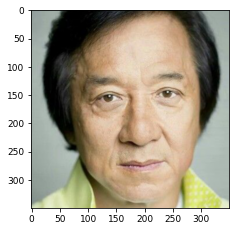

In [94]:
predict_drop_face('https://i.pinimg.com/originals/a0/56/6b/a0566b7c6138acfd1c23da5dd54bc9cf.jpg', True)

detections 1
69 341 71 343
[[6.7985578]]


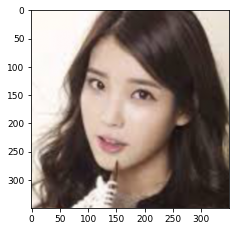

In [95]:
predict_drop_face('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhMWFhUWFRUXFxUVFRgVFxcZFxUXFhcXFxcYHSggGBolHRgXITEiJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFxAQFy0dHR8tKy0tKy0tLS0rLS0tLS0tLS0tLS0tLS0rKy0tLS0tLS0tLS0tLS0rKy0tLS0tKysrK//AABEIAQYAwAMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIEBQYHAwj/xAA8EAABAwICBwYEBAYCAwEAAAABAAIRAyEEMQUGEkFRYXETIoGRobEHMsHwQlLR4RQjM3KC8WKSU2PCov/EABgBAAMBAQAAAAAAAAAAAAAAAAABAwIE/8QAHhEBAQEBAQEAAwEBAAAAAAAAAAERAjEhAxJhQVH/2gAMAwEAAhEDEQA/ANsBSklHKw1RpKUiKAMIIgjQARokaIQIIIFaMAgiRoIEJQXLEAxZK/BHUFGSm2CBgz4JwckS/BTepieC4OquO9KcBJjJILwFO1vBG6GykmuERr8kg6QgVz7Y8EXangg3WEIXLtDwQ7U8EBJI0Go1RgYSSjKKEEARoIIMEaJAIIaCCJaMEET3gXKqOsmvlDDS1v8AMfwBsOpStEmrhKaYurFpWKaU+KWNcSKewwcm7R8ym+E1txrml1WoQ0wJLQLZiIi2YkLNutTnGwP03TpHZc9o5EiUTdYaLzHaDoJWBaV0yXn6jf1UbTxLpsSCMoMJZTyPTAxTSO6Qel/ZANCwLROt2JomztoflcSfVabqjrxRxRFMns635HZO/sOR6JYa5BqVCDHSEYQyKESUSilGASJyUERQaRARoBBbTAoIFBBgggggAgjRIASiLoRqC1q0sKFFzgb5DqRb9U7chybcVfX/AFrLQaNF3eI7zvyg/UrHdI4kkxce56lS+l8ZBJJlxmZUbgMMHHtKswCSG7zHssT/AKrZnyEYVzabA4tBeZub26HemVXEE9OSdaUxBeROQy5clGkrTFG56OnmkNEp1Rws/eSDh2ylF48VzqAEgjuuFwR7qQww7l9yYVQCYBg5tPPggNe+G+tbq4/hq5/nsEh3/kYIG1/cN/mryCvNGB0lUo1GVqZh9N0jluIPEEWPIr0NoTSjMTQp16eT2zG8HJzTzBBHgs34SQJRSiJRSlpFAopRSilFJLoIIErbMBBEgEGNBBBMAUSMokwRVfAKyLX7T7XVDfuUyWt/5OGZ8x6K9a8aYGHw7rw5/dbyH4neAt1Kwpm1jMQGZNHoP1Kl19v8V4+fR4DBVcQ7bA7s9SpXS+gn0qQc256K96B0Oym0CMgpHF6NbUbskeKneqr+sYPVPDxCTSpyVcdYNVnU3FwH6Efqoalhg3MW9lbnqVKzDJuD2XA5gqQ7ENEhJc8BwG45cim2Ixey6Nx9CtE6vxEGOKjcU6/t1ScViJ9lydU2h95pFpb3zfjY9VpvwZ0x/Vwjj/7Gcvwvj/8AKy4Hdx91M6maS7DGUakwNsNcf+L+6fLPwSpvRMoErm1070olZZKlJncilEUjxOJJQlEqJgjQQlBjlEUEEyBIqPABJ8UtU/4laZNHDFjfmqWPJpsT45I6uRqTayz4iaxnE13Bp7jZa3oN/jfzRfDTB7bqr+bWj3PuFVcdUuVd9SMPiaOHbVpNa5ryXbMjaO689Ap3xXn1pVClAhdw1QGA1ka47NRjqb94IVgpukSp4o51sM1whwkFZ7rjq+aE1aYJpn5hns/stI2lzxNJr2lrgCCIIK1P4TzvjnEGxtmEzxFWVctcdWzh3mL0XHuu/KeB/VUqqwgkHMKk61LqYQ4pdJ9+q5oBNg5IQ39UkvyKMfX9/qhrXoHU/S3b4Wk8/NsgO6tsfaVPysw+FWkZpvpb2ukdDc+oK0xjlMyyUHJMpRKAmkSUQhComJIpZeJ97rpCQBB63/X75oAC3T2SgUEQO5MDWVfEjaqMrVBkxwA52bB6b/ErUMR8p++qo/xEw4FCqdz2Bp6/hI9R4BZ6a5YS9hcQ0XLjA6kwPUrUMJoWqKlKg2u6lTDAJaBJIGQm27eqlqRo3tcdSacgS4/4tJHqAthxmAa4RAWeqrzFJ0ZpoOxDsNWhxD6jKbnDZeez/OAA0SJILfymd03nBjuCNyj6Og2B/aFo2/zjMjgTvFlL4WlDViz61/hlj3OiGmCoGs7Gj+m9ruRMepU1jpzVO0zSq1MO6t2tRrg5sUafdIYXAE3gveASeE8kcy2nfDvHYjEuYWYihtNNjAn2Wf6Z0LHepyW8/mbycp3QmnMVTBqVHF9Hb2e//Ui/etwtKtmJ2KgDgAZHzCLg80b+tGbGJ1GRYrm4wrlrdoxje+0Qd44qmvarc9bNQ6n63CqJkHqujT99EVGj3C7mkAooWjUHSPZYpt7OsfRbpSd3Ryt1XmnBVtl7XDcQvRGhcT2lGm8fia0nyv6rHXoSYS0gFGFklhQQRK7A0RCCCDJB3IEI3BJLRz80g513w0k5ASqD8R9JtGHLZvEnkTYfVXTHwBJcYF7nNYnrrif4msaVHvNaSXP+YAdfvILFrfMcfh3WjG0nG22HtHgxx+hWwi6wnQ2K7PHYeLBlRrf+3c/+lubSsdKwpwRVRDUYcJub7k20pUtAS34c9dcJRDgZTavou9vVL0XXsRvCk+1EJzLC+yqziNEDeB5Ju7BtY2GgAXyVgxNSVBaVxAAKx0pGf65m0KjvpEFW3T9XtKgHNDHauFtPadnG8xAG4LfPWSRPrnbqq0KoDHjiE3ThoBcRmPdN3AgwVVGiAutu+HuO28M3i0QfD9lidMytO+Gtctab5mCOgEFY7ONKbUXTbTZhyhLBU9NbESCC6UwQQQQCXOTHG4trAS54Ebl3r1WibSYy/U7lWMbWBl73BjW5vgBrebQc3cyp2tcxA616ZfUY4AbLYvIIsTAtO/n+6p+sekKVGmKNBu6XP/Md55+yda26Zp/06LHH/wBlQmTzAOQ571RsfXnfPNZ5m1TyG7ahnaBuDIPMGV6E0XjRVo06oyexrvMSvPDTZat8LtJ9rhjRdnSdH+Lu8PXaHgn3Pg5v3F6cARdMX6PBO1tut/yMeIFj4quaUFWjX2mvcaZ+ZhMgc2E5GN2V10GsOwMyb/KWEOjjaVnHRfx2TVmweGFObyXGScl3c6ygtH6wUqh2ZIdwIIhSdSqs1jHHGVoVV03i7G6lcfiFSNYNIZrHta8itaaxxae6YcTY8OaYYjS+JrN2atZzmjdYDxAAnxTfGPLn3R4dndK6ZJjmtulYYXhdcczeuNB3eP3vT17dpo8imyj2thwHFadoxoZQo16YjYa1tWOsSejr9CVn2Hw+1Vpt3l7W+bgFqerdMGnUpkd11P3aQbdI8lP8jXK3YMy0dE4aFG6t1CaLAbwI8rKXAUzWZGggurUQRFBApBFVqcvLDvcD/js/qCs31r1gZSLg4F9Se4yYZTabtc4270EefgtPxnddt8BJHEAwR5OKwz4nU208YYu14FQdHSI8wVhvlXQX16obI7zsxYAb3HoOSjcaRMDIWC7DGkF2zabeBzTOo4Zpxq+EF+5Wf4b6T7HGNaT3aw2D1zZ62/yVRJuu2HqkEEGCDIPAi4K1edhS/XojSGA7SDk4b+PVQ1bRTzbYb/cZPpkk6ra40sTTa17g2sB3mG0kfibxB9E61k0z2VIFjhtOqUx4F42vS3iufbHTz+TrMld8HghSbnJOZSMXig0FMcZp+mGyXZjJVbHabfVMUxHMrA+2/TjTelosDfgq0cG+pLneAUzgdEFx2n3KlMRhg1mSJcOxmGLpxUPVGLW6pxpRv809U1qm66p45evTZtneKkMHVlxB3ppiacQeI/ZHRdBBQSToVNmo12UPafIytHwOJu6P/GDH+AEDjJWW1nw7qrvqvie0LQDcgDpH7kHwUvyT/W5V80G7YYABvPlMA+MAqV7dNMJgQ1oAnd+ydDCc1L6FvRFEgupIaCIlIeSeXNANcU4d48BH1P3yWMfFGmx1QFrgXN3cAb5bhPHitO0zh3OrUw9zhQmHNYS2Sci45xusQqDrrgG/zXtaGsp1AxrGiAGlslx5k3lTvqnLKWs70HJCo2Zgd0fYlOsRSBNlyedlscdyoVMy1HTMERmntBggyLbuSkNVtWa+Mq7FFsxm42a3gXHdfxWtI907qjVwuGw+KqOH84WDZlhI2myeY4LvhMJUFGgXvcTVO1DiTADgRE8gD4req2iadTDso12tc1rWhw/DLRHkqRrOcWS6XUX0AMhsuLTtWiBLTskeql3Pjf46o1PC3gqX0bgmzdcWxKk6Bhc9dKRYyBkmWPEtKd3IVd1p0i3D0ztGXn5Wz9MoRJbStxS9YIFQMGYu7qbx5KMJ+iQ6qXOLjmTJKTOS65MmOW3bp7WgsAnmPv7yTfDWcPuVy7SyOjXgidyCPce3KwHT7sk6L0o+g8PYbjd9+yLH4kOAi3qPNMAUBuupmumHxQFN8MqgCWkwHcS3h0V8o0GOEj0K8p0WkuEfNIiDF90HitU+GetdbabQqVC+bAvMuB/KSRJy9FmyQ22IkEFpgaQ8JUptjsYykx1SoYa0SSUByxuHa5p2siIM9PdZBrhpYMOIobYO0GXBna/1A8lcNPYqvVp7TyaLHfJTb/VI/M8m1McrnobKtaH1Hp1yatYlrIhoabvM3cS6bbt1+l52xXmM2xHdbPCPUqOqPM+K2LSnw7wjxDalUX/O0jhvaoCl8NK38VSa2K1MuBeSdjZa0ids8xIBEmdy1z1L8PrmyahdUNUcTjiTSDQxpAe5zoF7wLXMey3fQWr1HCUhSwzYBdLi4kkmwLnHfbIZKTaxtNrWMZssAa1rWCwGQAAyAXIUIqthroax0OL+7JIsW/idzOQFs1pLQx9bZplzi1to792ybDahZdrDWYKjixtEbRHeoPJa8NEDbbkHC4hadpXEuY2WUy/Owc1uQn8Vise1ix4fXd3Ni8FpDQQd87Fj1Weq3xAoEOuR9fbL90vSWmadBkvzsA0XdPLd5ps0kfLvjz5WVb1tbOzna2cgSsSS36pbY647XiuQ5tPuA/iIBd6ZHzVXxGJfUJc9xceLjJSHW3JDnAqs5k8SttK2rIMSLLpS2ef0TIIQ2eKe4fCvfkLc/wBF1dQptzvI9fBI8RhsklxUhicIY2gCm7KBMkD7gn6IJyapnVqq4VmuBuJdPMEFRLW2U5qrSms2eDp8jbx+qz14ceo0ESC0wCr2laofX2XkdnRa15ByL3Hu+QBPWFYVm+vuknUG4pw+YvpbI4ksEeXePglWuS6uJ/jMV/D03d1omo8X2Wi3/Y7p5m8Kw4vR4c0MaSGtAaINwBldNNXaYbhKRptE1KbHuIbG25zQS4xncqK0tUxzXsNNstnvAG8bx3iAo2r8wzxGrWKFYEY1zaciZZLonIxY9YWh4CgxjRsZG5dMz4qDpVnPphxEiJI/E3jIXXRNch0ZtOYO5b5uM9TYn3sBgGYmbZWvfkhQpFrYLi437zok35ADkjYOMZmPvjmlbSqipWvWNohhbXpVXDu05ZDbu71ibRYSVktJwc8lsgE2DjJA3Sd9lpfxB0gKbnU216rHuYXloBdTdYM2TNgLA23rOcFT7zen3kpVXlLUhsgf47lF6002xs78/v73KWxD9hoceEAcYVS05iiepud+aOT6R2GpteS0ZwUyc3Za5pF5A8s0eGqbLw7gb+Nl1x1y4jiqp0yhdsIQHiYid90ljLoAX4oJZ2N7uRjPKR1SKGGa6HnMgmNwFoz3worB6TfTsQCMiCN3BPMDpMtMNFuBvbhO8LONaevxIEgg+WQ+oUcTDpGTuAUjXxVNw7zehENj2UNjABkZRBSHtj75qT1dxHZ16Z/5AQoYOnwUgxkbLhMxPDI5j73JdeCPVkoIIitJhKy/4zYQH+HdMbb9l3CG5HjI2itPVR+Ieh3YhuG2BJZiKZM5bJPenyCVanqUBLQGsYdloAAEAAAQBewUfisdsmHU3Eby0bUdQLpzjsYGtlxKgKGttBzywseOZAg+Rn0UbXRzz/E3TLY2qZBBzG49VJ6PdTqDaDRLSJ4g7v2VTq4uHmqwwyAHCM5MDoVYdAUKg2iRAcQbgg5WIWuLdZ/JzJE3QpwAOGUkuPmbpNd0X8F1IsuOIAIuLKqDNvirUqNcz+YAyo2BS2RPddJfteIG5UzAxtADcFdPirBp0HQNoOc0zmJEx0Kz+vim0wC434bzvU7NqvN+HGs+lGMphubzkN/Ak8lUjXNQEuN1wxmINR7nvJLifTcF1w2HebgARvcYCpJhbrkaQC4zJjinVZlpcb8B9U1w7C5wAzke6bNPGM7oMQR6i4XfD4UEnlf9Vx0nXEwMwT+/qj0XWJcBxMeaVEW6jq4yowEA7pMWgxxXGvq1sARvyIy5+StujHNbTaPytI3cbfXK666UAbTJGYuBznIb/wDanqmM1x+hqlMyRI5JrUwTg3aFx981ptRocGTB7on0Ve0phBTIAHdeTA3NO+PP3T0sUWYKkWVJAaRGceO76oYnR57RzPyifBG1gjMXFgbGOYTv0nqhEjKKFpME20ge4Yzgx5JzCa6RPd80r4cVvHVGvbI8eR3g8CqfpKk1ju0sAM1Y9J4IVLbTmOt32mJJJ+YZH35qEbooNd/MearhMbYhrSBIIZJk9ZUby6ee5IS7FbejsVULXBrdhwJttMH4o/L7qb1JFYYijQNZxFDBtfWaTtB9SsQ4XJkbAHqmGMpdvhMTQHzVH4do/wAnNt7q06m0QTicRH9Su5rTESykBTbHKQYVuZiHd2rKU3qmDlY5nh1XLSekqdAB1QxJgWJk8LBQWN0zVIijSkbJJNSQQ45cUXqQuebUT8TGxhi+JDqjInNpAsR1FljekKREmZkfdldNbMRj32xF6QJcGs+UGInj5qrubtSevksb9bzIq14S21OLz0N07/h4BlR7mwbqzNKeSbCSnuFp9j33jvfhbv8AHgFyw+P2PkaJ4m/7IYmsHCSO8UiNXu2iSczfxOamdWKANZrjk2XeUCfMjyTDR+AdUnc0Xc7h+6vGqOr8kPcC1hIAE94gCZPD91m05ExopjiWh19+cRJnpKe4yq4t+UiJgeYm2alH0QxoAFvboudWg1zCXbxOcza/RYbMMLh+6yb7Lbm2edhwUTrMwbLXGBDxcZW59Cp+k3+W3jffJyCqGni+pUFH5gDOyOOQBO4fugGuiKPbVXvgwQI5gSRPXNNcTRp4auRUbtMdlv2QTJEcFbdD6P7NhBz3+vomOmdCjEUw4u2S1zogA2NoM+BQWN2QRSgqJjTDSRyT4qM0g+6VOeoOozvffElQeMdG042ADzOVhIlWDFCATyVI1pd2jTQaSAQQSM4kn1hTUdNUdKvfhMViG/McSynSByB7NraZ/wCzpWnF7cPQa1xA2Whs7i6PqVU/hNoRtLCXEzXe8TxaOzB9CrXpzDtfTO0QAIcCchBn2sqXz4n7VPxj8VizJhrAZb4bxvPil9hXot2tvbPAiPZP24txbLWwNxIz6KNwOl3ucaeIaGnaOxBlrm7iDAvxG5RdMB+KGIova5kGCCDEjyWdHDdm9zOB9FoeksIWntKefDc4cCqVrGR2gqtMB1iDuI3FE9K+ILT2jyGF7cgL9FV5BFxdXnG4lvYP2jbZd5xb1Ko1CntGOSvzfiN9d8NgyXAASFJ0dA1Kjr2HmfRI0dQc5ssMPaY5W48oVp1exrakteNl7bObG/cenNK2nIfaH1bY0C2UePLmp/DhrSABABt4jclUamUGYuYul1WieH3PksG66QbLLXH3nC44apIAztA6BdcXGzY/r/r0TPBuEdN8eqA4V21AS0ECSRIF73tu4pFLBMpxGZkk5zxn91KVGSBPmfDj+m9NntEWjPcPsJB1LYaSOBzzmPb9FF4MTRBk5SpSqIpk8B9AoPA13DDuIbtHYcQOJi0IobTCJKRQqpAoXSLoceqm1DaZp3lZ6OIbT2JFOnPKfLL1hVDB4eQXuzJmfX2JU9rSJLRc2b9T9E2o4f5WgZuA8zs+xU/9Uni+aI2GUWMafla3POY2j7qH0niS50PyG7P04ptpjKxsaz7jk0NHoEVKqGiSMhnnC11S5n1zxWmKbHBrw5oM94tOyI/M7IeKPGYNlRtoIz/QhdmU6dVpILXA2Iz6ghMsLgRQMU+6z8n4R/aN3RYVDCvgdm8kkZE71TviFgAKXaNdsu5b4BP0V2xpaZ32MAZ+CqGna0s2HEOJ7s7htbh5ZpwWsrq4yo8BpMjhkOU8V3wVBwM795NgFPUNEkkhrWg9F1dq/VMH5x+XIW5DPxVf2S/Vz1cw5O0YPedLTvO6fqpLTzBRNGuyzxUDHDe5pgQfojo4bEMEMaAeGyT9QuuF0E99QVa79otggAGAePM+ayaxYCrJkiJtfO6eAS7jB/ZcMNh8rRCesbfp9+KQdKrbR4njv+5KisE8B7x433qVeLET15Z/fFQlduzVHOyAlyZFvu3GPu6aYjiPsDxn/S7brffouOIB9ckgPFmKbs42TPkSeSi9AsBY0RuJ+/vcpHSdUijU/sd7JGqOED9lswCCT5fqgNYQQQVUhFNNIU9ph5XQQSoioaYpyWO5e3+0NDMBrNP5Q53iGkD1hEgpz1W+HOPH8ukPzOc71hdcOAXARmPcIIIpK5QquGNY1h2WntnkDIgHZaCOUKx4hxIkgW5/sggs8+K1B42tBIH5myeMnLoqXpSalanTyF3eWXuUEFpiFNMVDff9+/up7BDaEDln1/2iQQD+nTscuHrCVOwwnhBt5/REgmHak4kTvKVh95+7IIIBVQiJPCyhdKs32tGSCCQPMK8loneiri4HP2yQQQHHSzv5T+bPcfupHUxsPHKnPnCCCbN8f//Z', True)

detections 1
88 359 353 625
[[6.42519]]


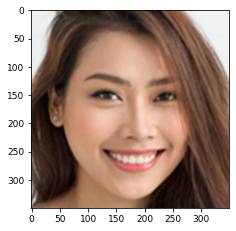

In [96]:
predict_drop_face('https://www.90daykorean.com/wp-content/uploads/2020/03/bigstock-184859833_f474526c572f7d27d99262fd25977e8c.jpg', True)

detections 1
117 704 348 935
[[4.40999]]


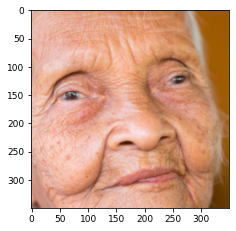

In [98]:
predict_drop_face('https://image.freepik.com/free-photo/close-up-portrait-90-years-old-asian-woman_41898-359.jpg', True)
#Kindda high value, but it is sometimes very hard for the model to reach a very low score, because it has a limited dataset, and the scores are a mean.

detections 1
190 680 91 581
[[3.7075677]]


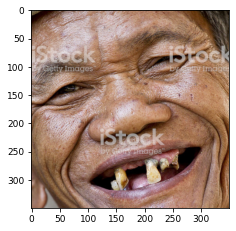

In [100]:
predict_drop_face('https://media.istockphoto.com/photos/happy-old-asian-man-picture-id178496494', True)

detections 1
74 754 203 883
[[8.194499]]


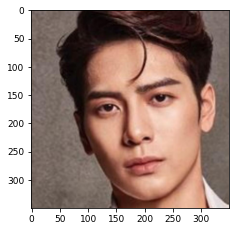

In [103]:
predict_drop_face('https://www.straitstimes.com/sites/default/files/articles/2019/11/13/nz_jackson_131147.jpg', True)
#Asian people in general have a higher prediction rate, because more people from the dataset was from that origin

detections 1
126 692 234 799
[[7.3920856]]


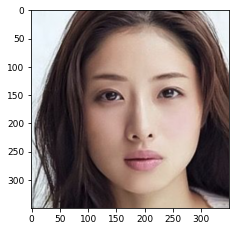

In [107]:
predict_drop_face('https://i.pinimg.com/564x/14/05/dd/1405dda40535c5b6fc172c6c54b3b2ce.jpg', True)
#maybe thi score is too low. The background is good, but the image probably has added some filters to it (from instagram etc.), which might be disrupting the image

detections 1
7 399 285 677
[[7.762206]]


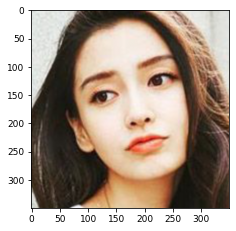

In [108]:
predict_drop_face('https://i.pinimg.com/originals/e4/9a/d8/e49ad88b2c2d60fb89b38496313fb364.jpg', True)
#Good prediction, image is a bit blurry


detections 1
96 662 113 679
[[8.806421]]


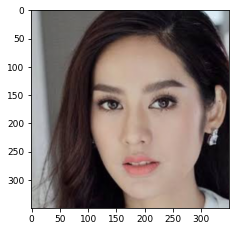

In [109]:
predict_drop_face('https://qph.fs.quoracdn.net/main-qimg-8c97617085c6fc04e8326e5af9fff2f2', True)
#I think this is a very good score.. Background is not noisy, and image is very clear

detections 2
109 580 76 548
[[5.9114294]]
80 551 707 1178
[[4.757651]]


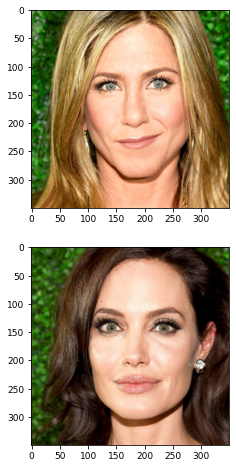

In [113]:
predict_drop_face('https://www.usmagazine.com/wp-content/uploads/2018/01/jennifer-aniston-angelina-jolie-zoom.jpg', True)
#Prediction one is okay.. but maybe a bit low.. there i a lot of lighting on the images, (maybe it is a spotlight)

detections 2
60 387 625 952
[[7.6286592]]
80 407 108 434
[[7.030054]]


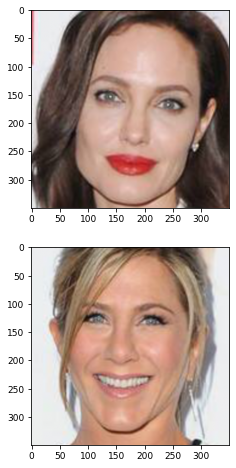

In [116]:
predict_drop_face('https://akns-images.eonline.com/eol_images/Entire_Site/2015016/rs_560x415-150116133816-1024-jennifer-aniston-angelina-jolie.jw.11615.jpg?fit=inside|900:auto&output-quality=90', True)
#Lighting seems more natural, and the background is not so noisy... Now the predictions seem better (but maybe still too low)

detections 1
142 378 43 279
[[6.70287]]


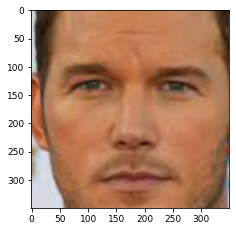

In [121]:
predict_drop_face('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTd-A-kx3w44HjgoauW7SJ4cqHKxvkbJ8c4OvODxdyCvHcXkVI&usqp=CAU', True)
#It gets the intuition.. But maybe too low. Image is a bit clurry and the cut is not very good either. 


detections 2
31 357 85 412
[[3.96484]]
150 477 483 810
[[5.321845]]


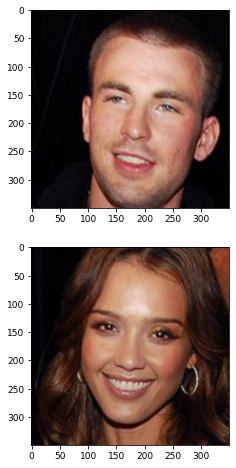

In [123]:
predict_drop_face('https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2011%2F10%2Fjessica-alba-440.jpg&q=85', True)
#Bad lighting and blurryness can definetly mess up the score

detections 2
105 670 1193 1758
[[6.9282074]]
105 670 161 726
[[7.477556]]


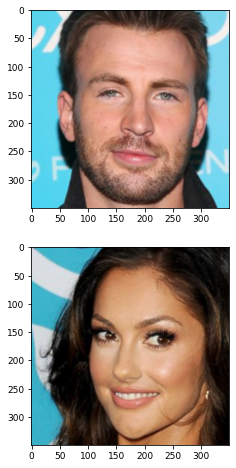

In [128]:
predict_drop_face('https://s.abcnews.com/images/Entertainment/GTY_kelly_minka_chris_evans_hero_split_33x16_992.jpg', True)
#When background is the same, and faces are more clear, it will give a good prediction

detections 1
7 687 595 1275
[[6.97158]]


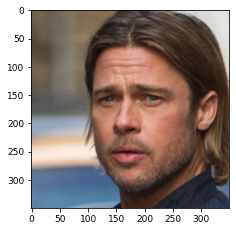

In [137]:
predict_drop_face('https://static1.fashionbeans.com/wp-content/uploads/2019/08/brad-pitt-19-top-1.jpg', True)

detections 1
49 615 92 658
[[3.2240694]]


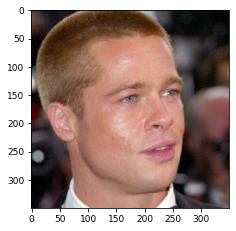

In [144]:
predict_drop_face('https://i.pinimg.com/736x/2f/ea/ed/2feaed767673c67f7c07586aad8cd35d.jpg', True)
#has not been trained on short hair.. not the best angle, background noice..